# **EIACD ASSIGNMENT 2 2024/2025**
**Afonso Santos** (202406585) & **David Pereira** (202405163) & **Hugo Ferreira** (202407214) & **Xavier Teixeira** (202406657)

## **Project Introduction and Objectives**

O propósito fundamental deste sistema é **prever se um determinado estudante será aprovado no seu exame final**. Ao conseguir prever com antecedência quais os alunos com maior probabilidade de reprovar, podemos identificar aqueles que necessitam de atenção e apoio adicionais, permitindo a implementação de **intervenções pedagógicas direcionadas**.

Ao longo deste notebook, detalharemos cada etapa do *pipeline* de *machine learning*, desde a **exploração inicial dos dados** e o seu **pré-processamento**, passando pela **engenharia de *features*** e o **balanceamento de classes**, até à **modelação**, **avaliação** e **interpretação dos resultados** dos nossos modelos de classificação. O nosso foco será demonstrar o impacto de cada uma destas fases no desempenho final do sistema.

## **Data Exploration**

Nesta secção, realizamos uma **análise exploratória inicial** do dataset *UCI Student Performance* para obter uma **compreensão abrangente** dos dados com os quais vamos trabalhar. Esta etapa é crucial para **identificar padrões**, **anomalias** e potenciais **desafios** que podem influenciar as etapas subsequentes do *pipeline* de *machine learning*.

### **Attributes Explained**

O dataset é composto por **395** registos (estudantes) e **31** *attributes* (variáveis), que podem ser divididos em diferentes categorias:

* **Variáveis Demográficas:**
    * **sex:** Sexo do estudante ('M' - masculino, 'F' - feminino).
    * **age:** Idade do estudante (numérico).
    * **address:** Tipo de moradia do estudante ('U' - urbana, 'R' - rural).
    * **famsize:** Tamanho da família ('GT3' - maior que 3, 'LE3' - menor ou igual a 3).
    * **Pstatus:** Situação de coabitação dos pais ('T' - a viver juntos, 'A' - separados).
* **Variáveis Socioeconómicas:**
    * **Medu:** Escolaridade da mãe (numérico: 0 - nenhuma, 1 - ensino primário, 2 – 4º ano, 3 - 9º ano, 4 – ensino superior).
    * **Fedu:** Escolaridade do pai (numérico: 0 - nenhuma, 1 - ensino primário, 2 – 4º ano, 3 - 9º ano, 4 – ensino superior).
    * **Mjob:** Profissão da mãe (nominal: 'teacher', 'health', 'services', 'home', 'other').
    * **Fjob:** Profissão do pai (nominal: 'teacher', 'health', 'services', 'home', 'other').
    * **reason:** Motivo para escolher esta escola (nominal: 'home', 'reputation', 'course', 'other').
    * **guardian:** Responsável legal do estudante (nominal: 'mother', 'father', 'other').
    * **traveltime:** Tempo de viagem até à escola (numérico: 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, 4 - >1 hora).
    * **studytime:** Tempo de estudo semanal (numérico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, 4 - >10 horas).
    * **failures:** Número de reprovações passadas (numérico).
    * **schoolsup:** Apoio educacional extra na escola (binário: 'yes', 'no').
    * **famsup:** Apoio educacional familiar (binário: 'yes', 'no').
    * **paid:** Aulas particulares pagas (binário: 'yes', 'no').
    * **activities:** Atividades extracurriculares (binário: 'yes', 'no').
    * **nursery:** Frequentou a creche (binário: 'yes', 'no').
    * **higher:** Pretende prosseguir para o ensino superior (binário: 'yes', 'no').
    * **internet:** Acesso à internet em casa (binário: 'yes', 'no').
    * **romantic:** Está numa relação romântica (binário: 'yes', 'no').
    * **famrel:** Qualidade das relações familiares (numérico: 1 - muito mau, 2 - mau, 3 - razoável, 4 - bom, 5 - excelente).
    * **freetime:** Tempo livre após a escola (numérico: 1 - muito baixo, 2 - baixo, 3 - razoável, 4 - bom, 5 - muito bom).
    * **goout:** Frequência de saída com amigos (numérico: 1 - muito baixo, 2 - baixo, 3 - razoável, 4 - bom, 5 - muito bom).
    * **Dalc:** Consumo de álcool durante o dia de trabalho (numérico: 1 - muito baixo, 2 - baixo, 3 - razoável, 4 - bom, 5 - muito bom).
    * **Walc:** Consumo de álcool ao fim de semana (numérico: 1 - muito baixo, 2 - baixo, 3 - razoável, 4 - bom, 5 - muito bom).
    * **health:** Estado de saúde atual (numérico: 1 - muito mau, 2 - mau, 3 - razoável, 4 - bom, 5 - muito bom).

* **Variável de Resultado Académico:**
    * **passed:** Indicação se o estudante foi aprovado ou reprovado no exame final (binário: 'yes', 'no').

### **Visão Geral do Dataset**


Para iniciar a nossa análise exploratória, o primeiro passo é garantir que temos as **ferramentas necessárias**. Isso envolve a **importação das bibliotecas essenciais** como `pandas`, que é fundamental para a manipulação de dados em formato tabular.

Este notebook foi desenvolvido usando **Python 3.13.2** e as seguintes bibliotecas:

* pandas == 2.2.3
* numpy == 2.1.3
* scikit-learn == 1.6.1
* matplotlib == 3.10.0
* seaborn == 0.13.2
* imbalanced-learn == 0.13.0
* scipy == 1.15.2

In [24]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import imblearn
from scipy import stats
import scipy
from time import time
from copy import deepcopy


print("Versões das bibliotecas:")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborn: {sns.__version__}")
print(f"scikit-learn: {sklearn.__version__}")
print(f"imbalanced-learn: {imblearn.__version__}")
print(f"scipy: {scipy.__version__}")

Versões das bibliotecas:
pandas: 2.2.3
numpy: 2.1.3
matplotlib: 3.10.0
seaborn: 0.13.2
scikit-learn: 1.6.1
imbalanced-learn: 0.13.0
scipy: 1.15.2


Depois de importar as bibliotecas, o próximo passo crucial é **ler o ficheiro** que contém o nosso dataset. Utilizaremos a função apropriada da biblioteca pandas para carregar os dados num DataFrame, tornando-os acessíveis para a subsequente exploração.

In [25]:
data = pd.read_csv('student-data.csv')

Vamos começar a examinar as **dimensões** do dataset, os **tipos de dados** de cada feature e uma **amostra dos registros**:

In [26]:
print("--- Informações Gerais do Dataset ---")
print(f"Número de registros (linhas): {data.shape[0]}")
print(f"Número de features (colunas): {data.shape[1]}")

print("\n--- Tipos de Dados (dtypes) e Valores Não-Nulos ---")
data.info()

print("\n--- Amostra dos Dados (Primeiras 5 linhas) ---")
display(data.head())

print("\n--- Amostra dos Dados (Últimas 5 linhas) ---")
display(data.tail())

print("\n--- Estatísticas Descritivas (para colunas numéricas) ---")
# O .T transpõe a matriz para melhor visualização quando há muitas colunas
display(data.describe(include=np.number).T)

print("\n--- Estatísticas Descritivas (para colunas categóricas/object) ---")
display(data.describe(include=['object', 'category']).T)

--- Informações Gerais do Dataset ---
Número de registros (linhas): 395
Número de features (colunas): 31

--- Tipos de Dados (dtypes) e Valores Não-Nulos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes



--- Amostra dos Dados (Últimas 5 linhas) ---


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,yes,no,3,2,3,3,3,5,5,no



--- Estatísticas Descritivas (para colunas numéricas) ---


,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0



--- Estatísticas Descritivas (para colunas categóricas/object) ---


,count,unique,top,freq
school,395,2,GP,349
sex,395,2,F,208
address,395,2,U,307
famsize,395,2,GT3,281
Pstatus,395,2,T,354
Mjob,395,5,other,141
Fjob,395,5,other,217
reason,395,4,course,145
guardian,395,3,mother,273
schoolsup,395,2,no,344


### **Análise de Valores por Atributo e Inconsistências**

Exploraremos detalhadamente os valores de cada atributo para identificar **padrões** e **anomalias** que necessitam de atenção antes da modelagem.
1.   Missing Values
2.   Outliers
3.   Underrepresented Concepts / Irrelevant Features
4.   Correlação entre Features Numéricas (Redundância)

#### **Missing Values**

In [27]:
missing_values = data.isnull().sum()
print(missing_values)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64


*   Verificamos que **não existem valores em falta**, o que significa que não é necessário aplicar técnicas de tratamento de missing values, como imputação ou remoção de linhas ou colunas.

#### **Outliers**

Identificaremos e examinaremos os **valores extremos** presentes nos dados, pois estes podem influenciar **negativamente** a análise e a performance dos modelos preditivos:


--- Análise de Features Numéricas: ---


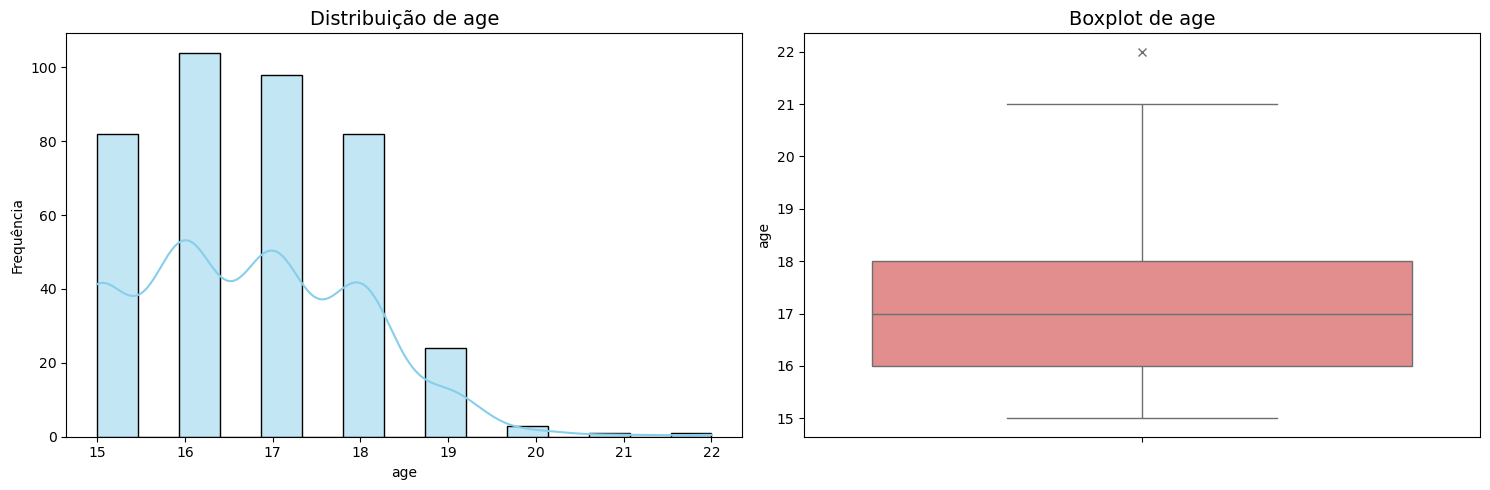

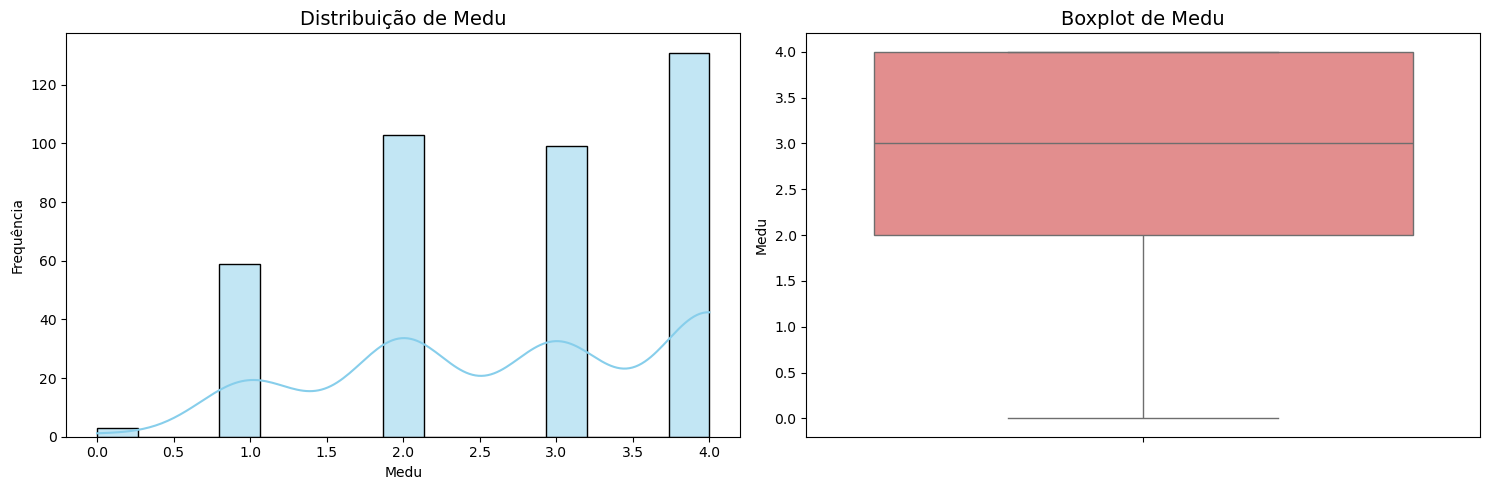

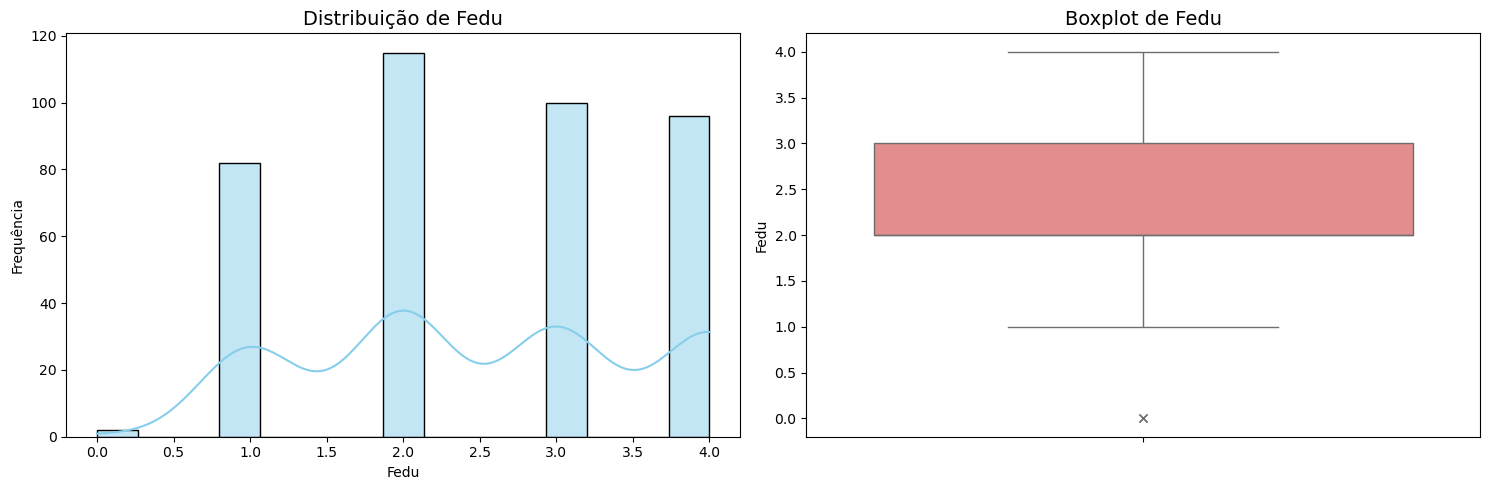

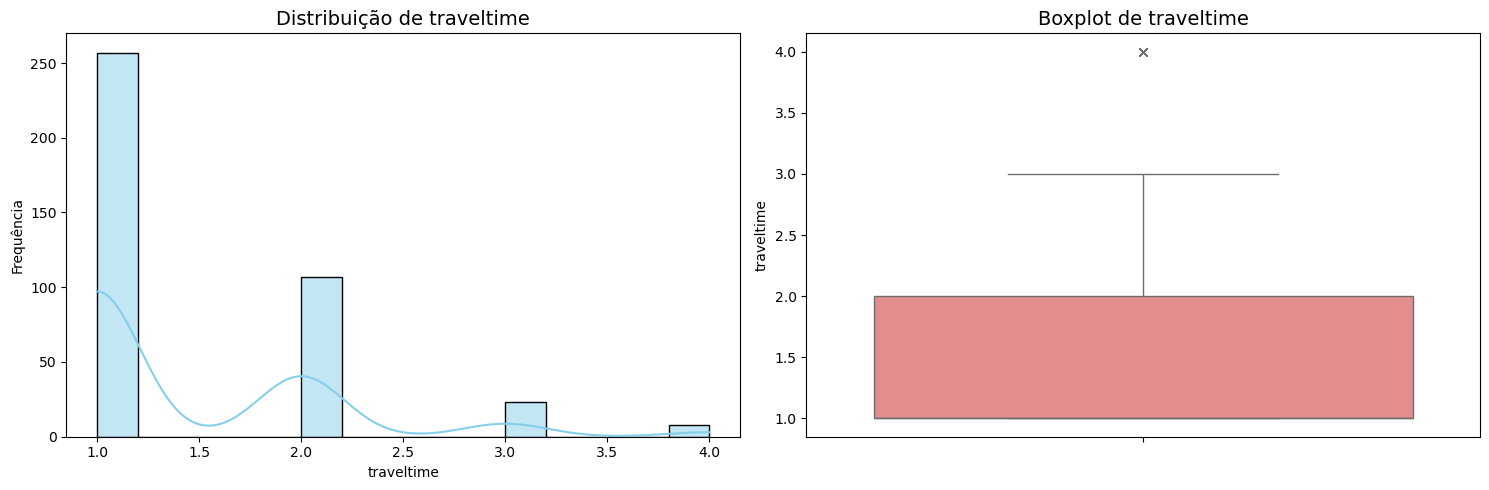

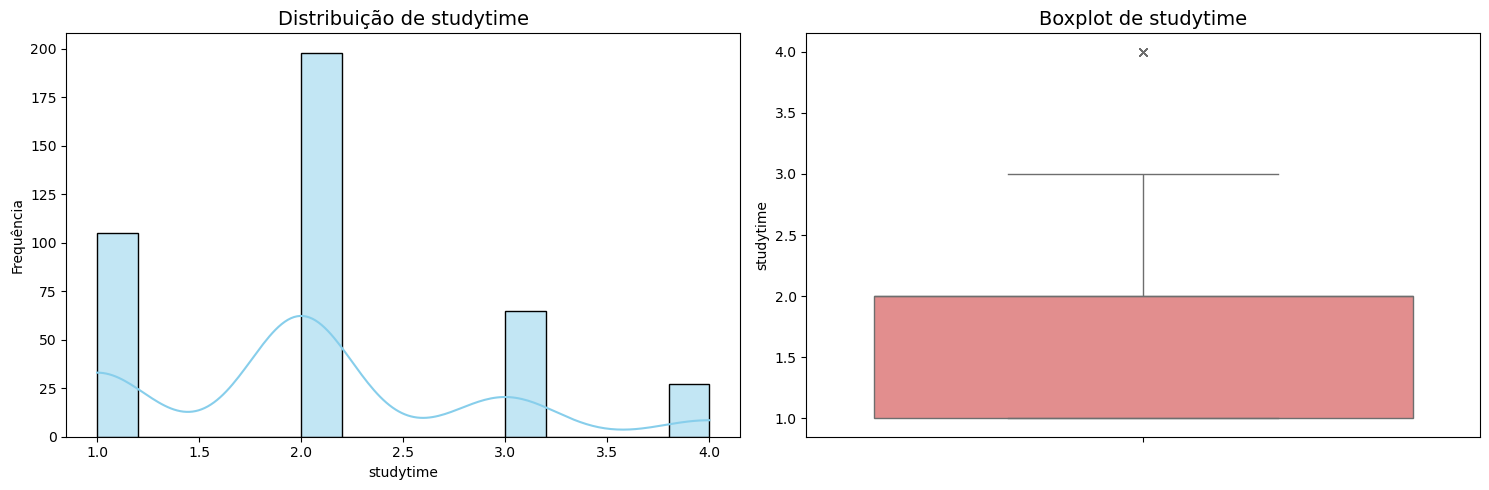

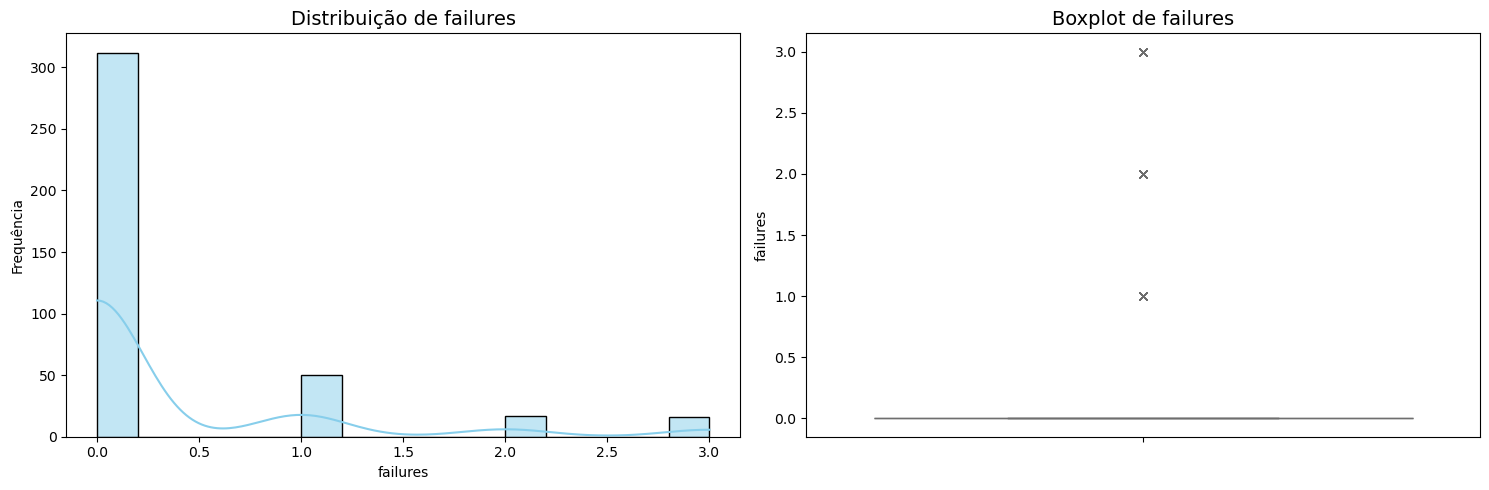

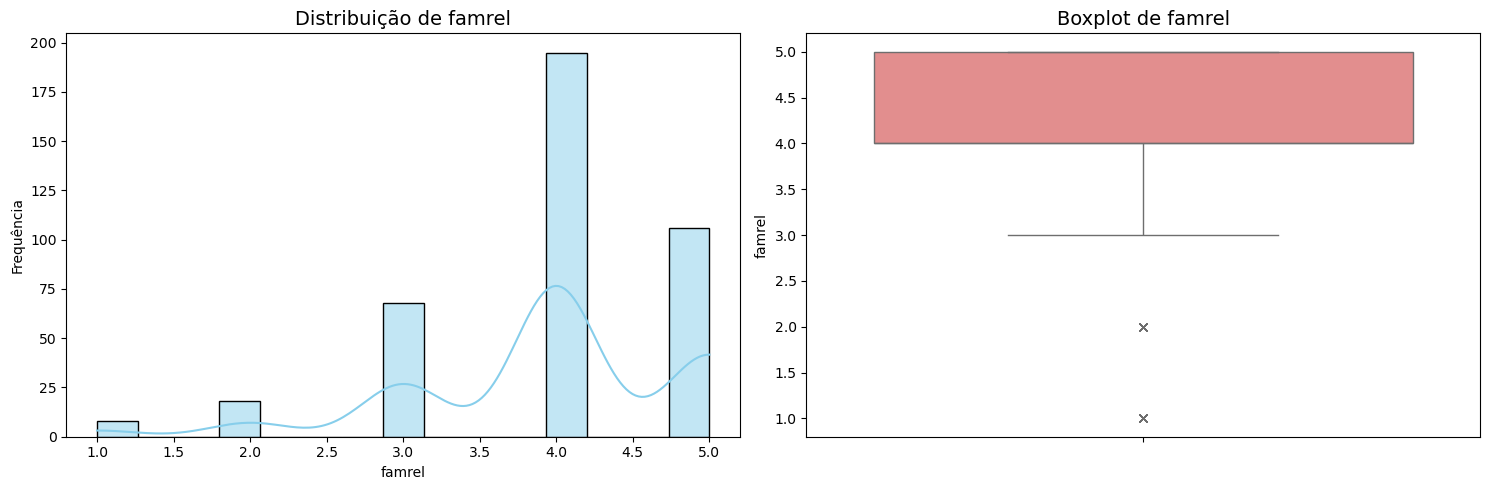

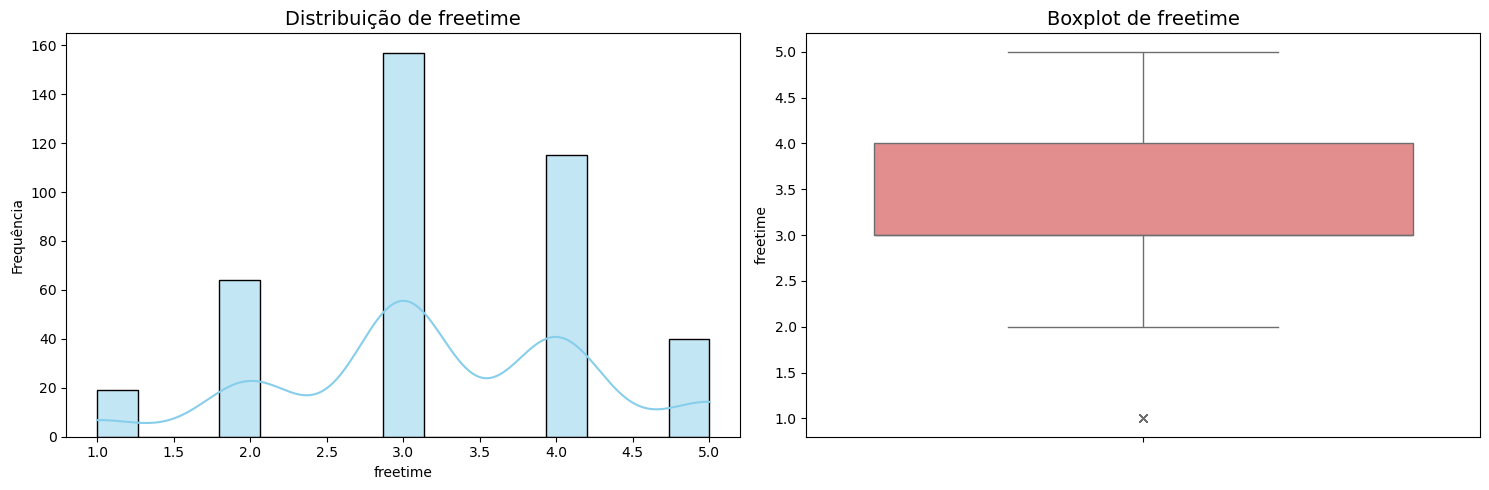

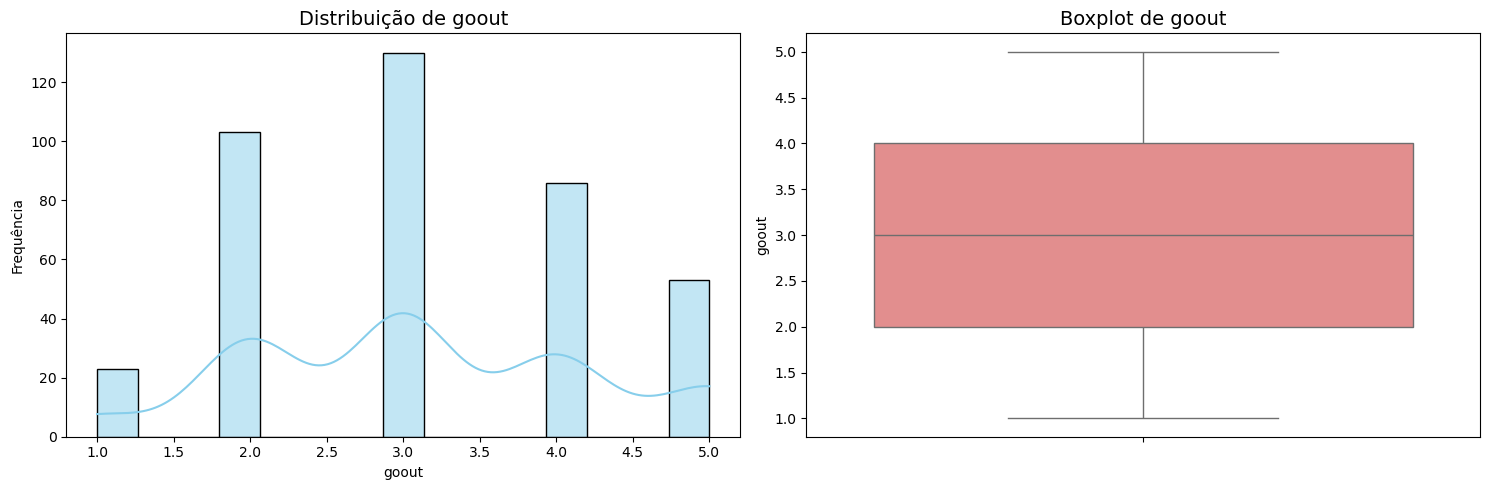

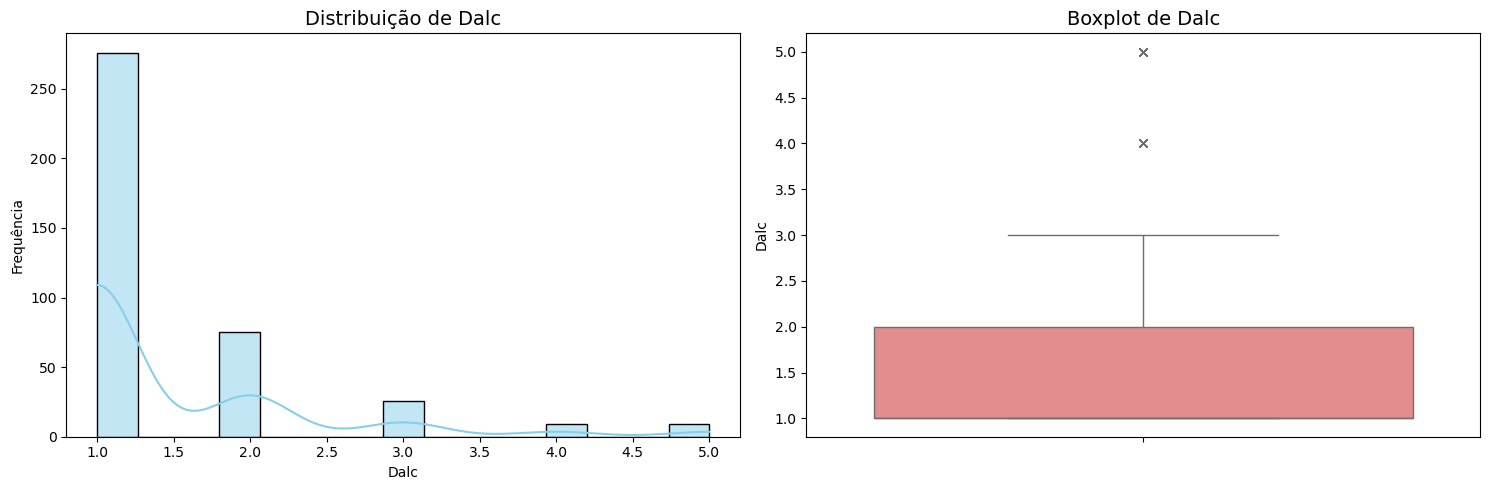

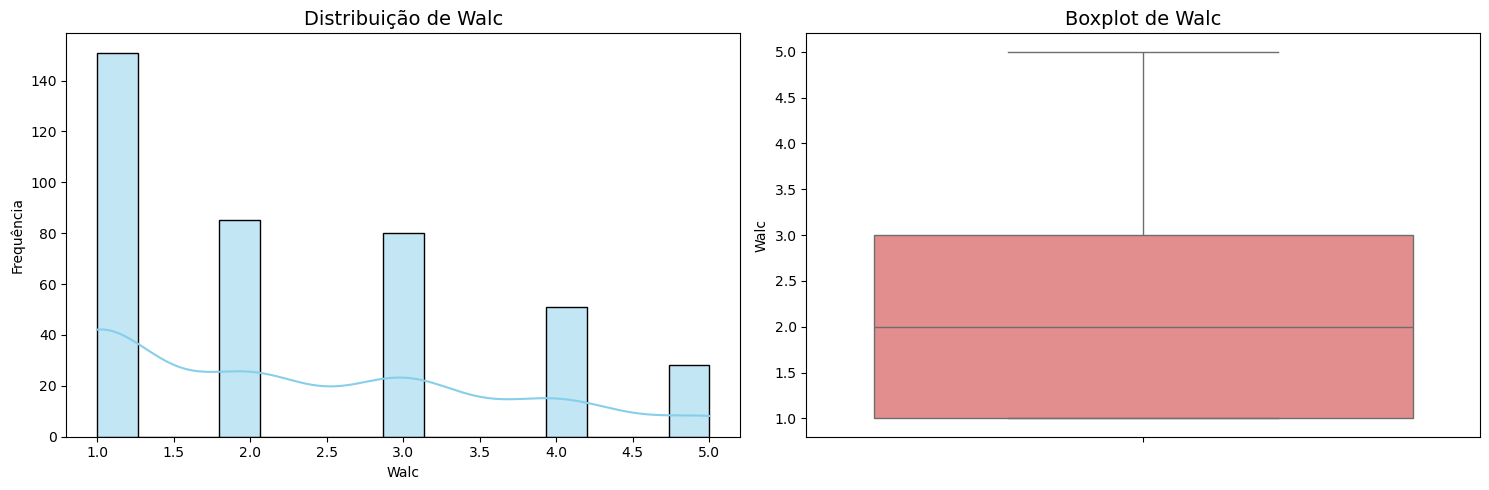

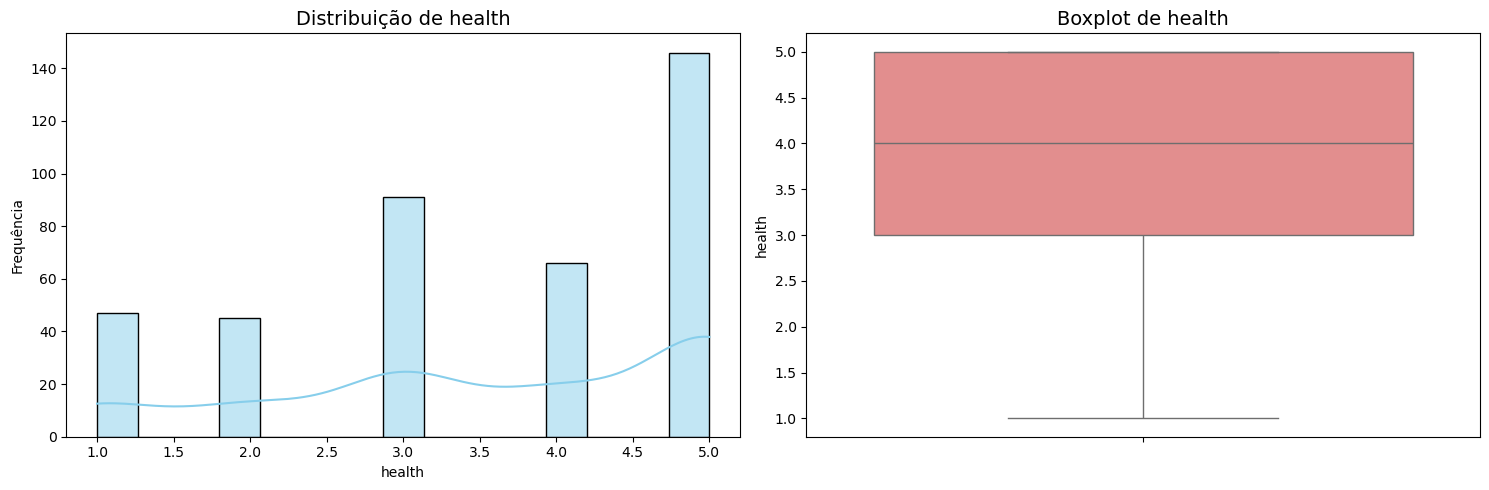

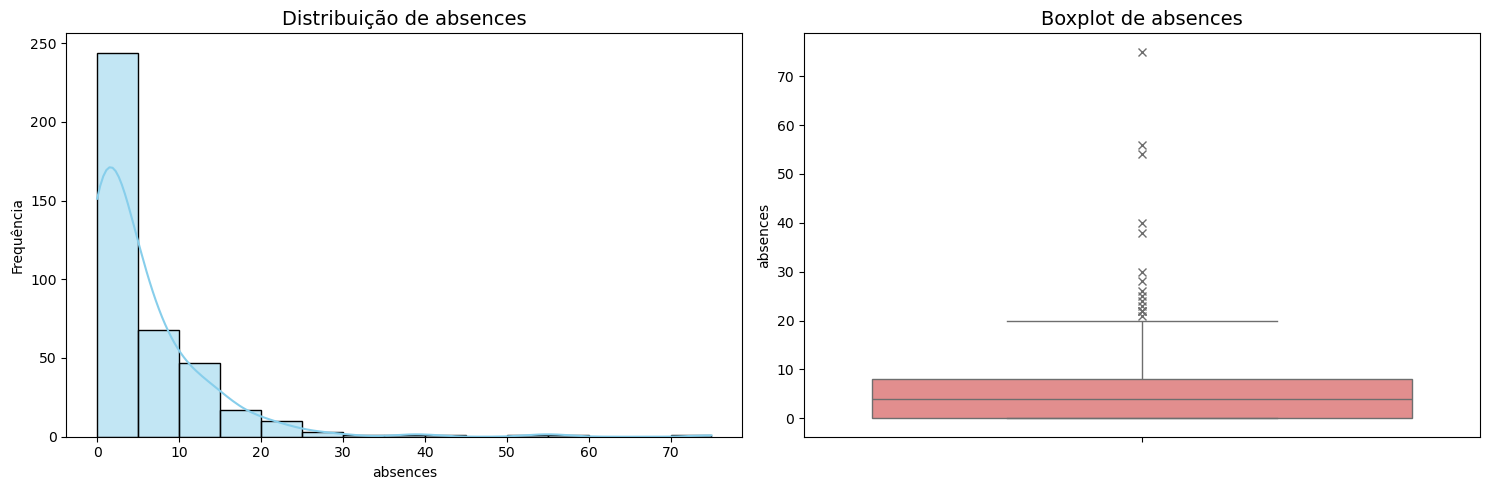

In [28]:
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

print(f"\n--- Análise de Features Numéricas: ---")

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))


    sns.histplot(data[col], kde=True, ax=axes[0], color='skyblue', bins=15)
    axes[0].set_title(f'Distribuição de {col}', fontsize=14)
    axes[0].set_xlabel(col, fontsize=10)
    axes[0].set_ylabel('Frequência', fontsize=10)


    sns.boxplot(y=data[col], ax=axes[1], color='lightcoral', flierprops={"marker":'x'})
    axes[1].set_title(f'Boxplot de {col}', fontsize=14)
    axes[1].set_ylabel(col, fontsize=10)

    plt.tight_layout()
    plt.show()


    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]

**Análise de Outliers em Variáveis Numéricas:**

*   **age**: A maioria dos estudantes tem entre 15 e 18 anos. Há alguns alunos mais velhos (até 22), que podem ser considerados outliers ou simplesmente alunos que repetiram anos.
*   **Medu, Fedu (educação da mãe/pai)**: São variáveis ordinais (0-4). A maioria dos pais tem educação correspondente aos níveis 2, 3 e 4.
*   **traveltime, studytime**: Também ordinais. A maioria tem tempos de viagem curtos e estuda entre 2-5 horas/semana.
*   **failures:** A maioria tem 0. Alunos com 1, 2 ou 3 reprovações são menos comuns e podem ser importantes para prever o sucesso futuro.
*   **absences:** Fortemente assimétrica à direita. A maioria tem poucas faltas, mas alguns têm um número muito elevado, que são claramente outliers e podem impactar negativamente o desempenho.

Com base nesta análise, identificamos que apenas a variável **'absences'** apresenta outliers que justificam **tratamento adicional**.

#### **Underrepresented Concepts / Irrelevant Features & Redundancy**

Identificar **categorias raras** e **features sem variância** é crucial para evitar distorções e **simplificar** o modelo:


--- Análise de Features Categóricas: ---

Analisando coluna: school
  Número de valores únicos: 2
  Contagem de valores:
school
GP    88.35443
MS    11.64557
Name: proportion, dtype: float64


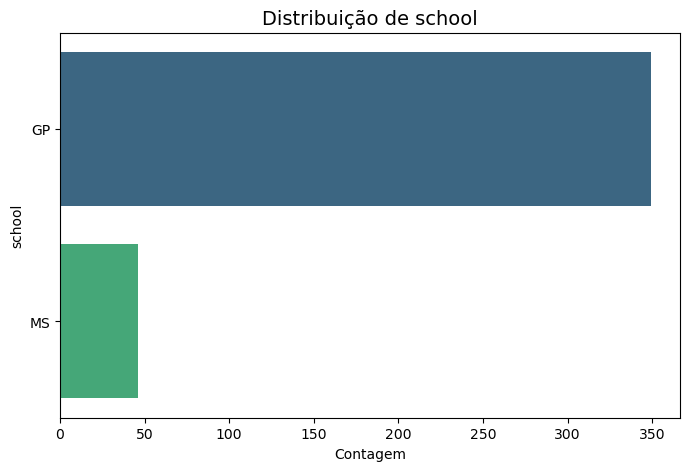


Analisando coluna: sex
  Número de valores únicos: 2
  Contagem de valores:
sex
F    52.658228
M    47.341772
Name: proportion, dtype: float64


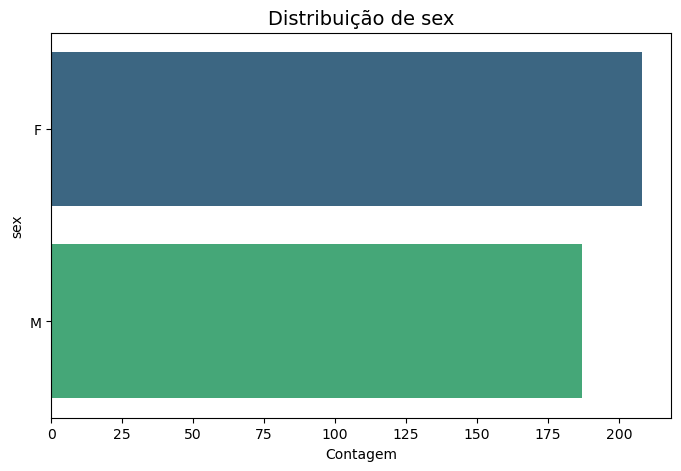


Analisando coluna: address
  Número de valores únicos: 2
  Contagem de valores:
address
U    77.721519
R    22.278481
Name: proportion, dtype: float64


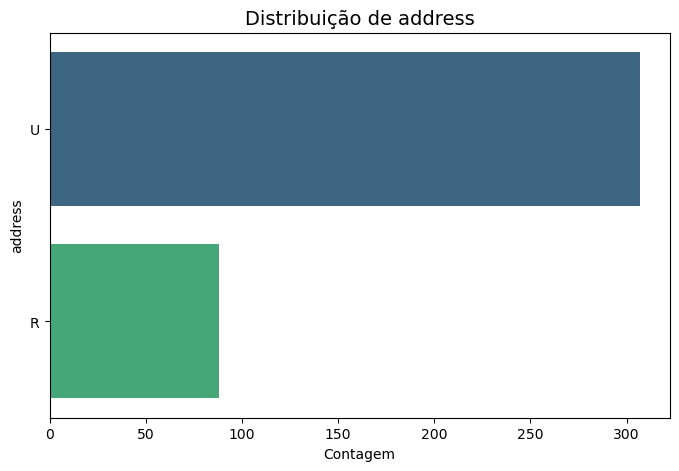


Analisando coluna: famsize
  Número de valores únicos: 2
  Contagem de valores:
famsize
GT3    71.139241
LE3    28.860759
Name: proportion, dtype: float64


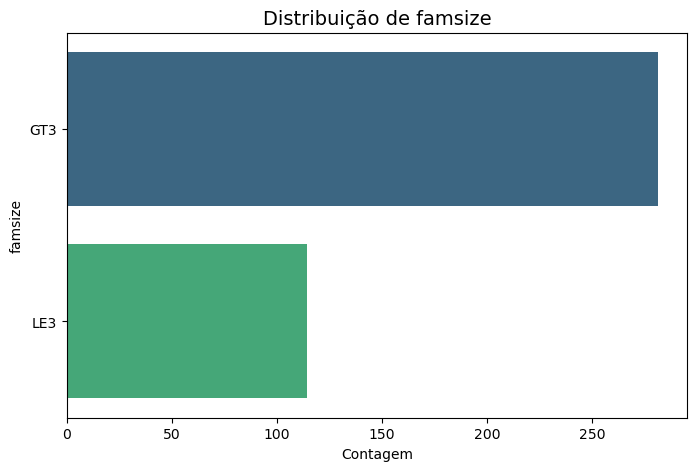


Analisando coluna: Pstatus
  Número de valores únicos: 2
  Contagem de valores:
Pstatus
T    89.620253
A    10.379747
Name: proportion, dtype: float64


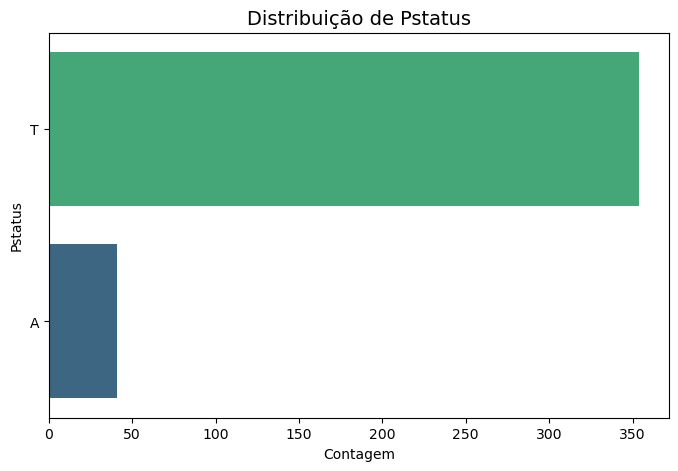


Analisando coluna: Mjob
  Número de valores únicos: 5
  Contagem de valores:
Mjob
other       35.696203
services    26.075949
at_home     14.936709
teacher     14.683544
health       8.607595
Name: proportion, dtype: float64


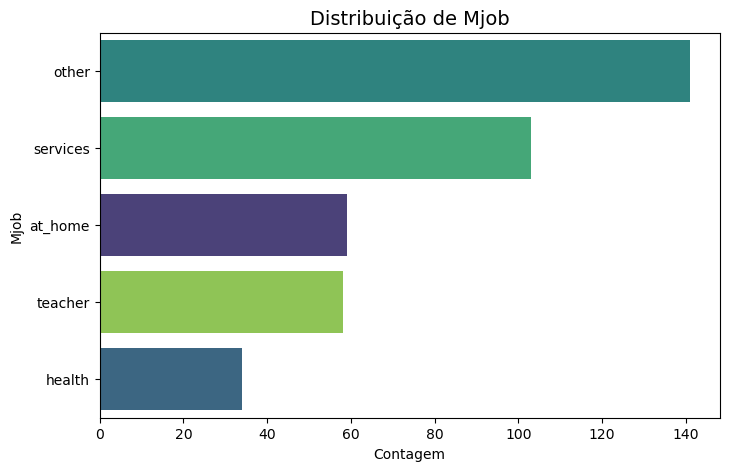


Analisando coluna: Fjob
  Número de valores únicos: 5
  Contagem de valores:
Fjob
other       54.936709
services    28.101266
teacher      7.341772
at_home      5.063291
health       4.556962
Name: proportion, dtype: float64


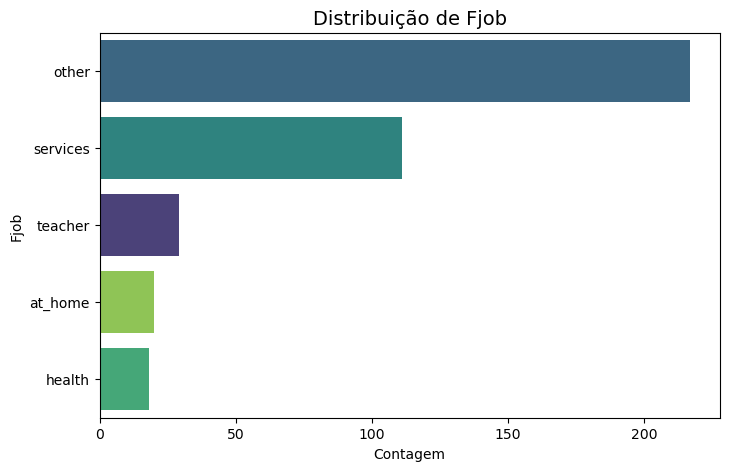

  ALERTA UNDERREPRESENTED: Em 'Fjob', a categoria 'health' representa apenas 4.56%.

Analisando coluna: reason
  Número de valores únicos: 4
  Contagem de valores:
reason
course        36.708861
home          27.594937
reputation    26.582278
other          9.113924
Name: proportion, dtype: float64


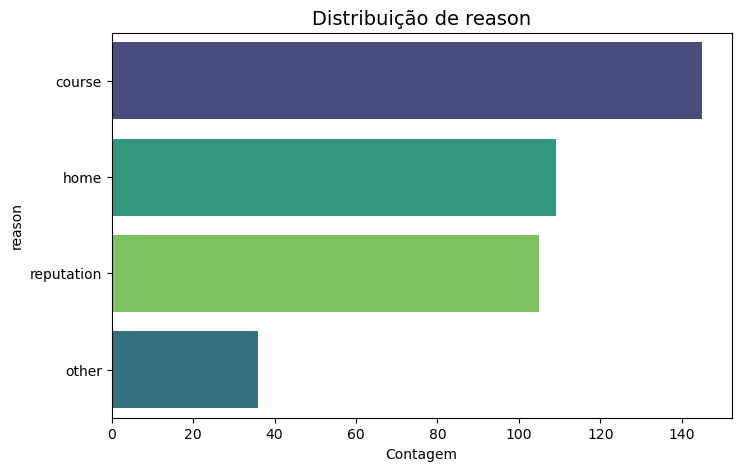


Analisando coluna: guardian
  Número de valores únicos: 3
  Contagem de valores:
guardian
mother    69.113924
father    22.784810
other      8.101266
Name: proportion, dtype: float64


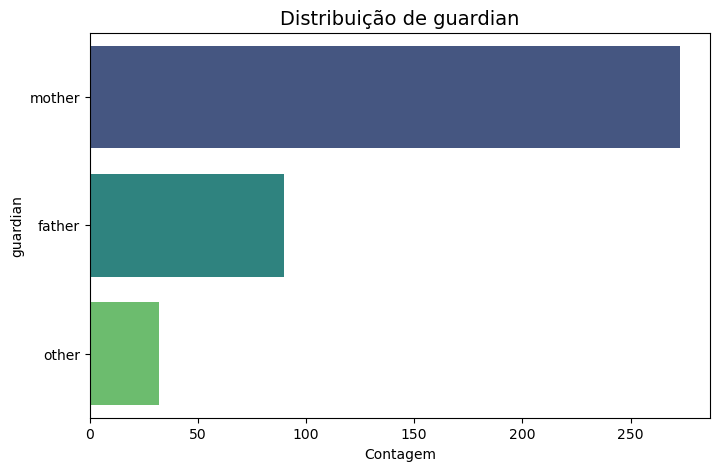


Analisando coluna: schoolsup
  Número de valores únicos: 2
  Contagem de valores:
schoolsup
no     87.088608
yes    12.911392
Name: proportion, dtype: float64


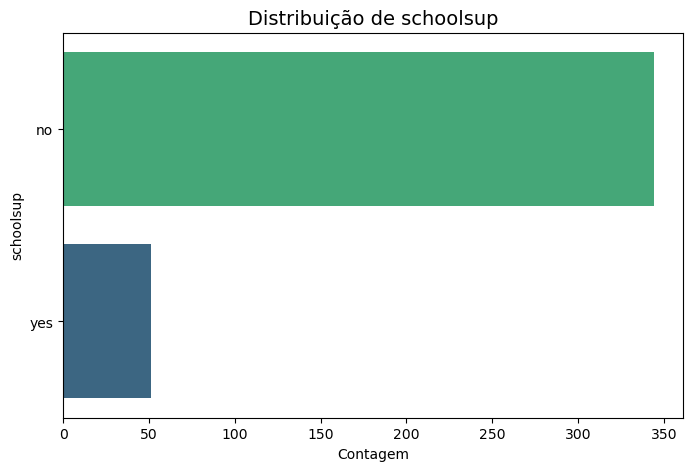


Analisando coluna: famsup
  Número de valores únicos: 2
  Contagem de valores:
famsup
yes    61.265823
no     38.734177
Name: proportion, dtype: float64


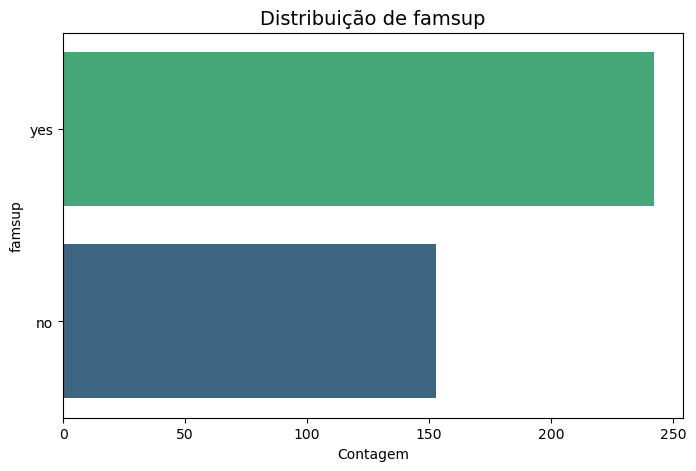


Analisando coluna: paid
  Número de valores únicos: 2
  Contagem de valores:
paid
no     54.177215
yes    45.822785
Name: proportion, dtype: float64


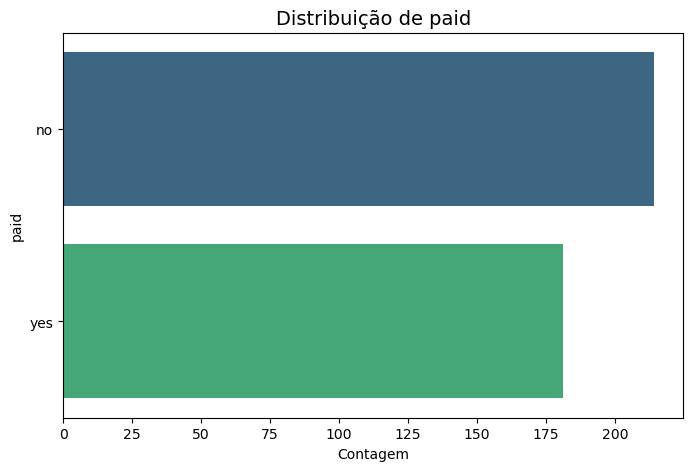


Analisando coluna: activities
  Número de valores únicos: 2
  Contagem de valores:
activities
yes    50.886076
no     49.113924
Name: proportion, dtype: float64


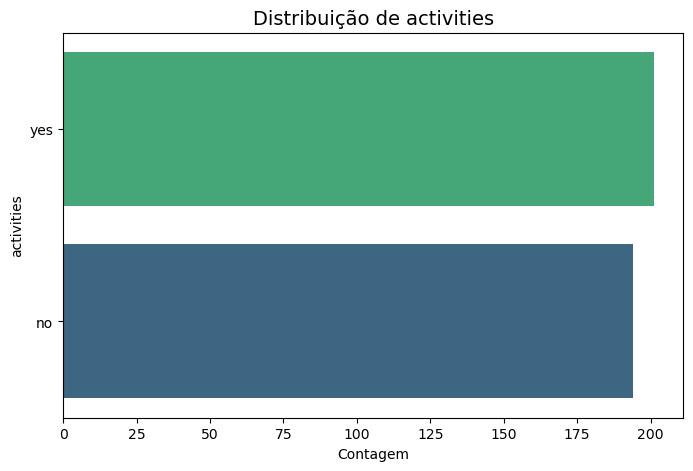


Analisando coluna: nursery
  Número de valores únicos: 2
  Contagem de valores:
nursery
yes    79.493671
no     20.506329
Name: proportion, dtype: float64


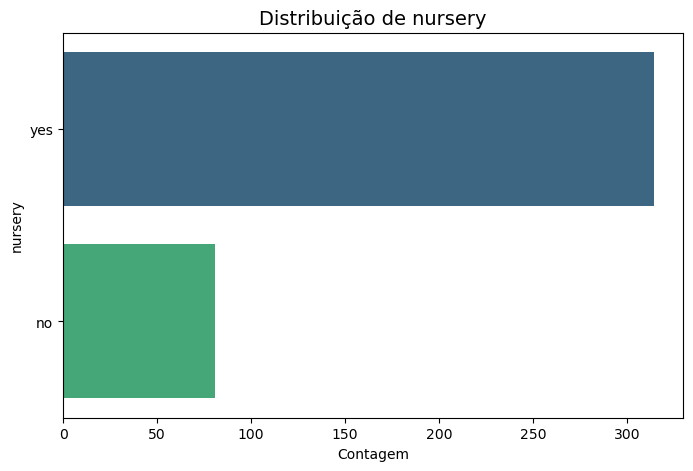


Analisando coluna: higher
  Número de valores únicos: 2
  Contagem de valores:
higher
yes    94.936709
no      5.063291
Name: proportion, dtype: float64


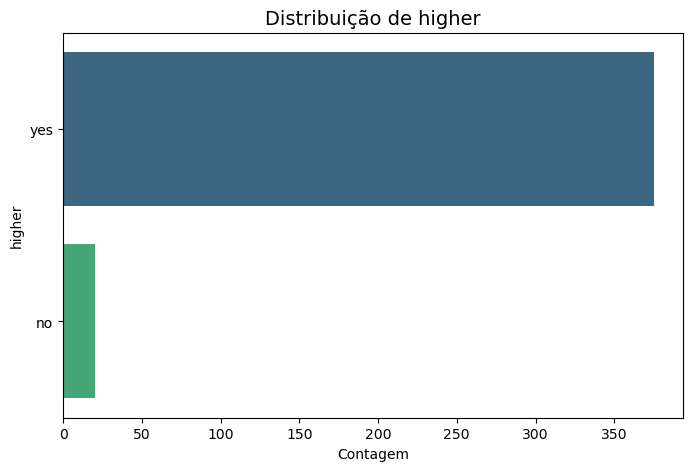


Analisando coluna: internet
  Número de valores únicos: 2
  Contagem de valores:
internet
yes    83.291139
no     16.708861
Name: proportion, dtype: float64


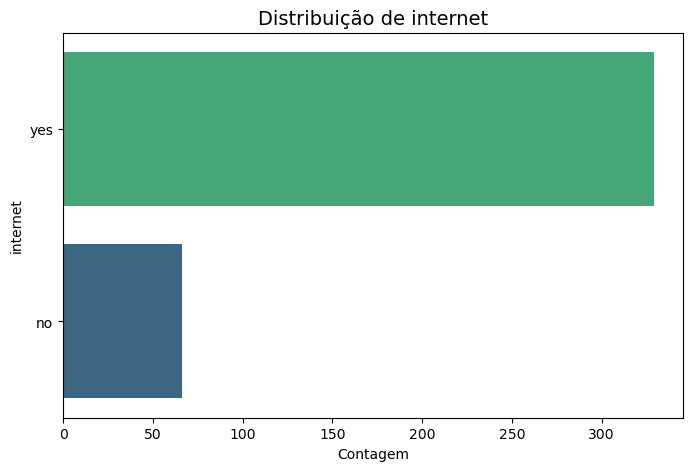


Analisando coluna: romantic
  Número de valores únicos: 2
  Contagem de valores:
romantic
no     66.582278
yes    33.417722
Name: proportion, dtype: float64


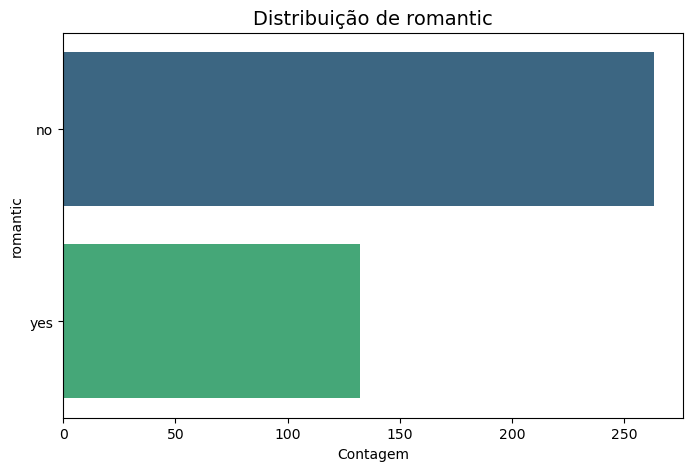


Analisando coluna: passed
  Número de valores únicos: 2
  Contagem de valores:
passed
yes    67.088608
no     32.911392
Name: proportion, dtype: float64


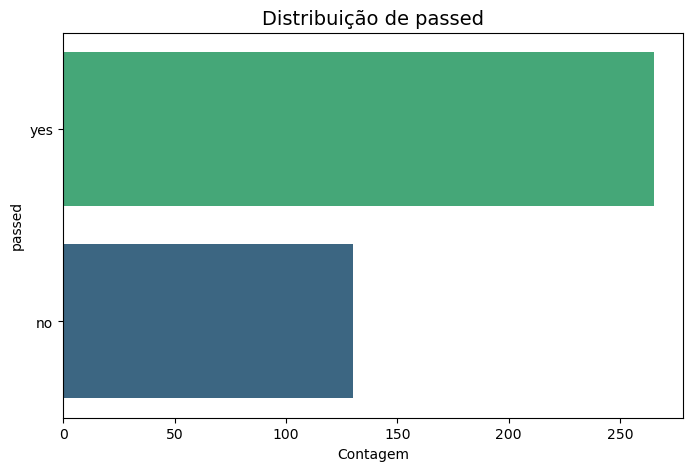

In [29]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\n--- Análise de Features Categóricas: ---")

for col in categorical_cols:
    print(f"\nAnalisando coluna: {col}")
    n_unique = data[col].nunique()
    print(f"  Número de valores únicos: {n_unique}")
    print("  Contagem de valores:")
    print(data[col].value_counts(normalize=True) * 100)

    if n_unique <= 10:
        plt.figure(figsize=(max(8, n_unique*0.8), 5))
        order = data[col].value_counts().index
        sns.countplot(data=data, y=col, order=order, palette='viridis', hue=col, legend=False)
        plt.title(f'Distribuição de {col}', fontsize=14)
        plt.xlabel('Contagem', fontsize=10)
        plt.ylabel(col, fontsize=10)
        plt.show()
    else:
        print(f"  Coluna '{col}' tem alta cardinalidade ({n_unique} valores únicos). Plot omitido.")
        print(f"  Top 5 valores:\n{data[col].value_counts().nlargest(5)}")


    if n_unique == 1:
        print(f"  ALERTA IRRELEVÂNCIA: Coluna '{col}' tem apenas 1 valor único. É uma constante e provavelmente IRRELEVANTE.")


    value_counts_norm = data[col].value_counts(normalize=True) * 100
    if value_counts_norm.min() < 5 and n_unique > 2 :
        print(f"  ALERTA UNDERREPRESENTED: Em '{col}', a categoria '{value_counts_norm.idxmin()}' representa apenas {value_counts_norm.min():.2f}%.")

Analisar a **correlação** entre as variáveis numéricas pode revelar **redundâncias** e insights sobre como **se influenciam**:


--- Relação entre Features e a Variável Alvo ('passed') ---


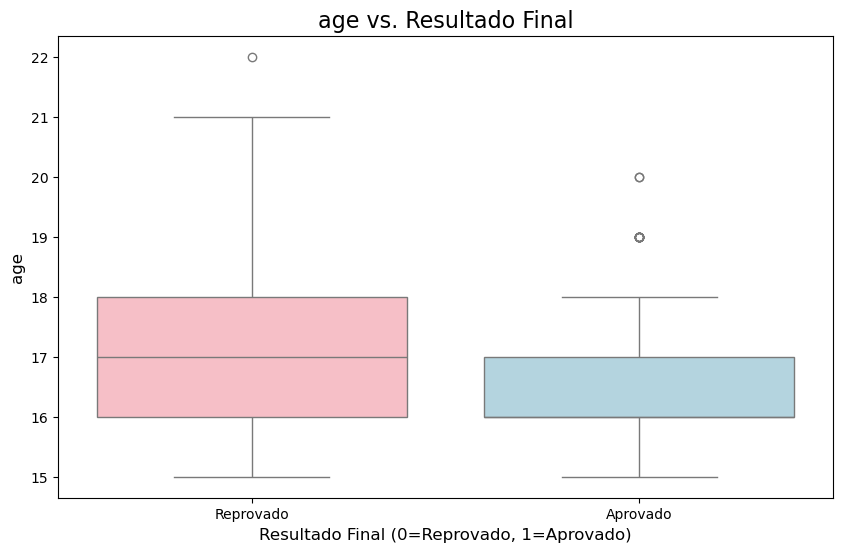

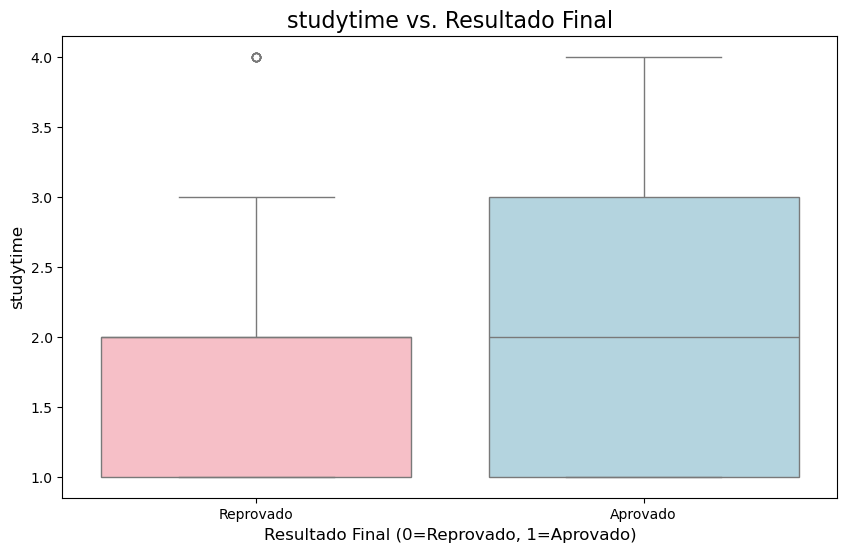

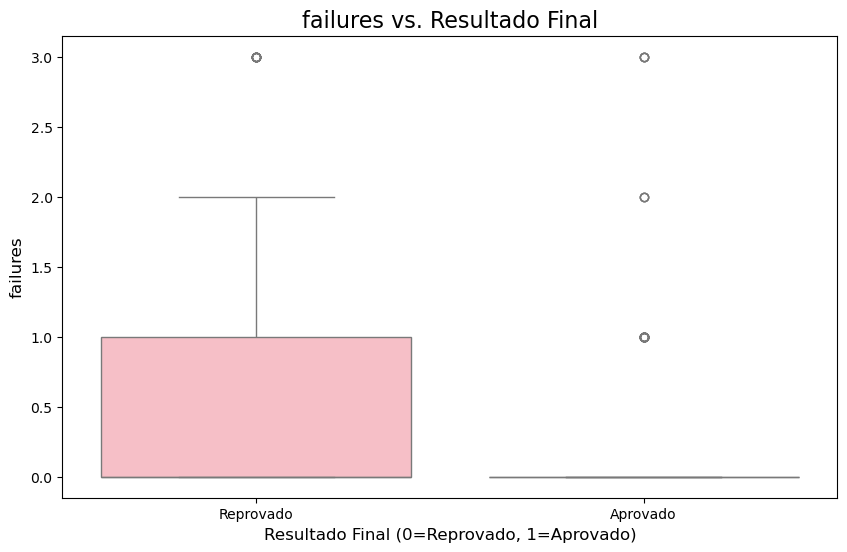

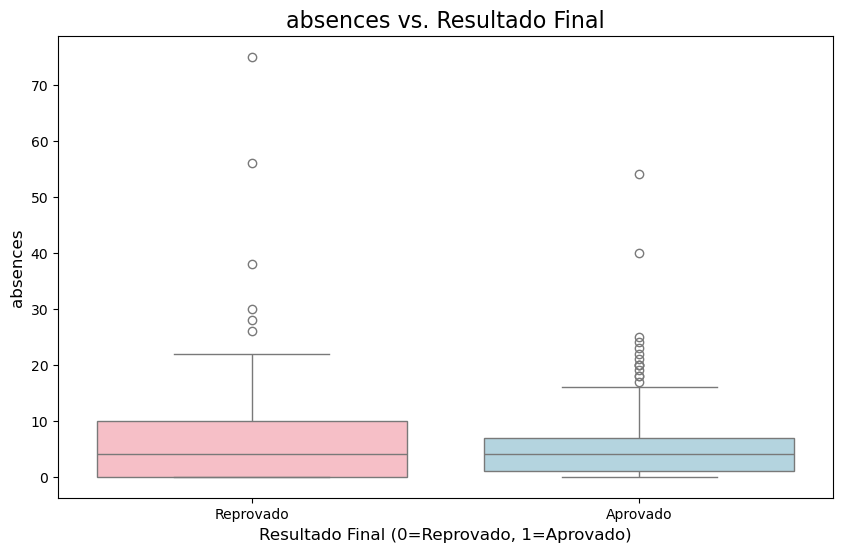

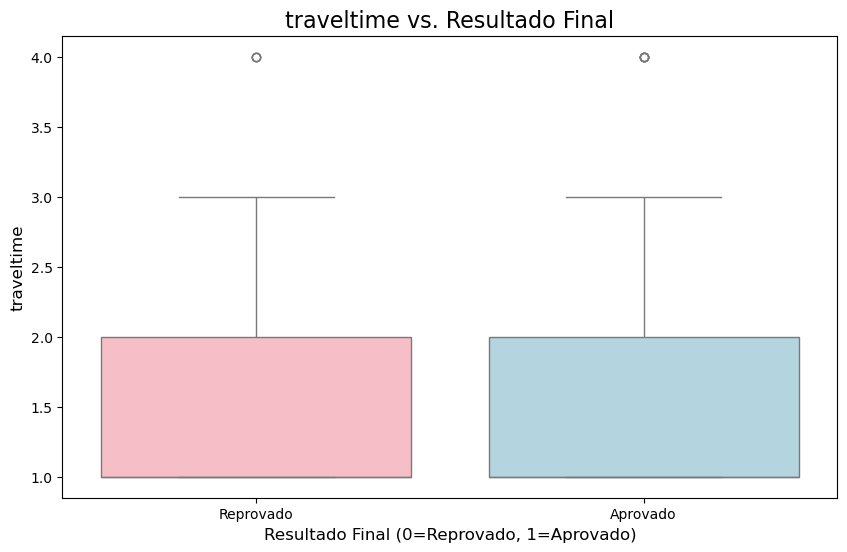

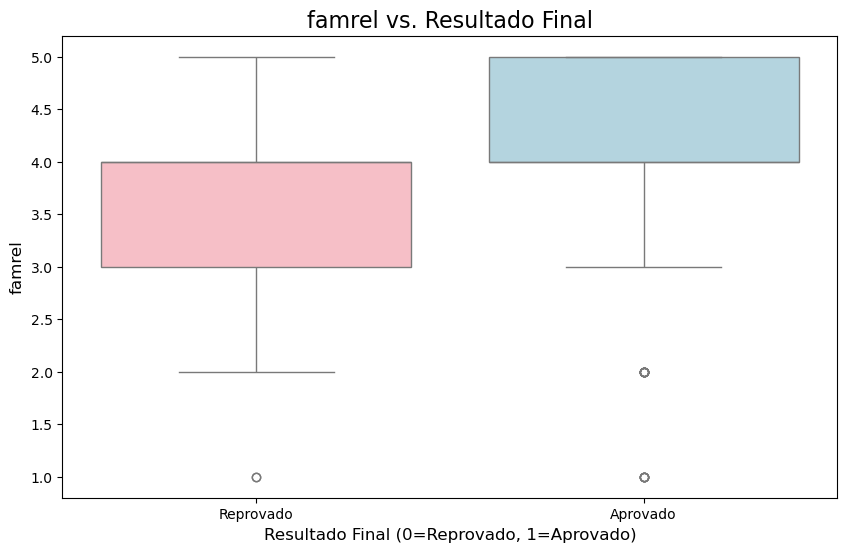

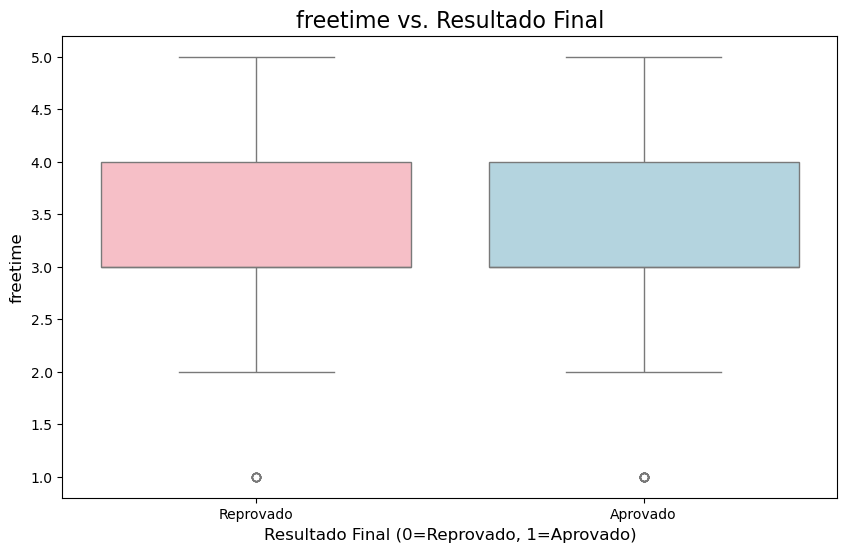

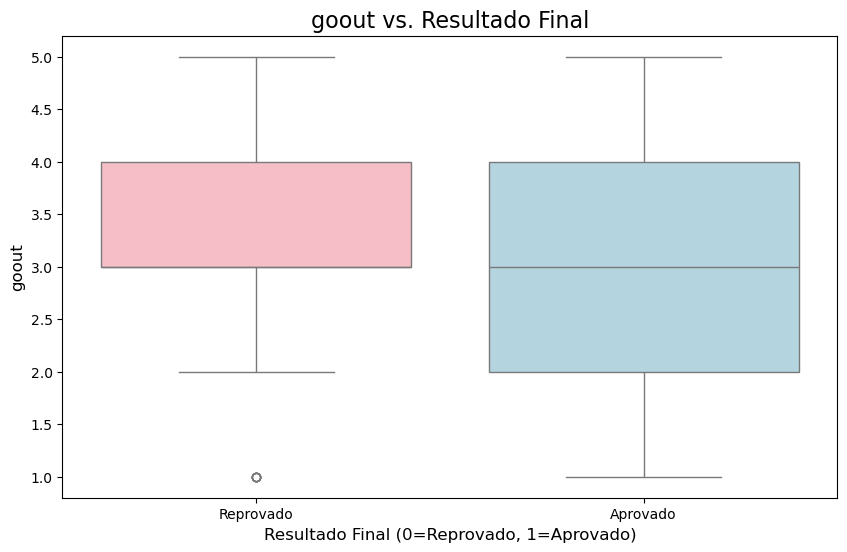

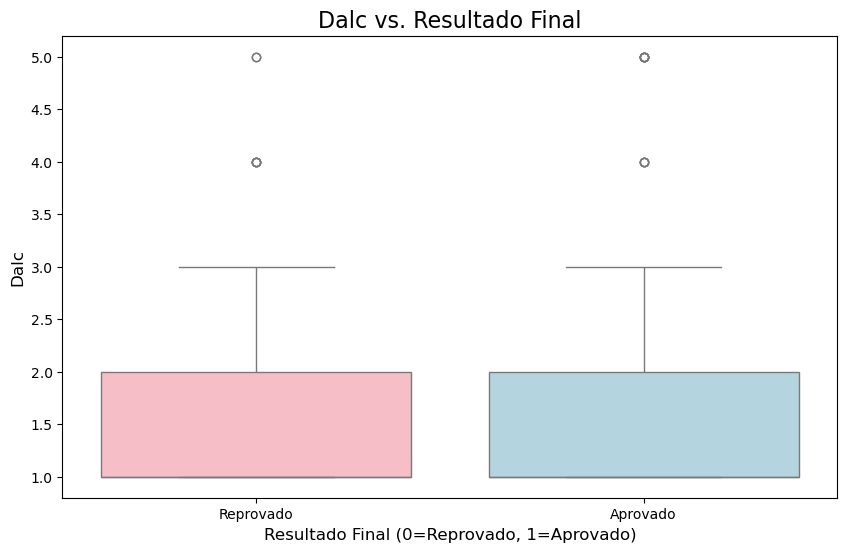

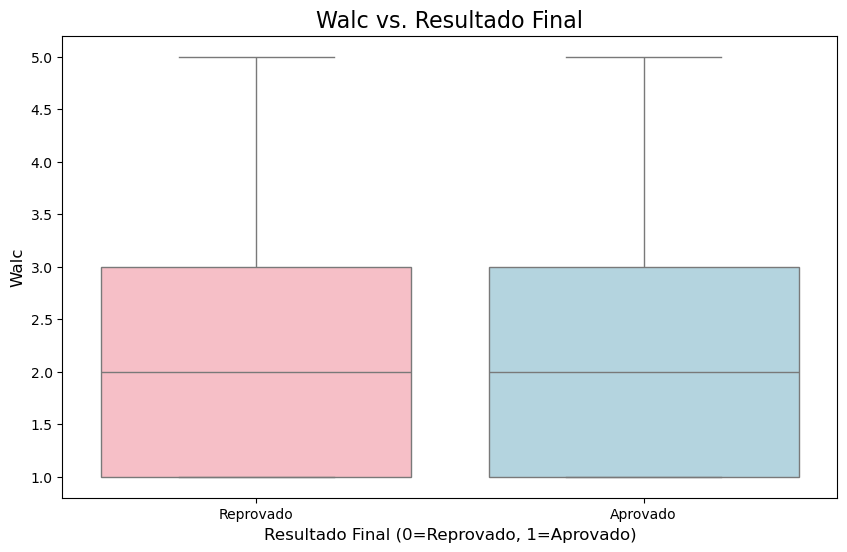

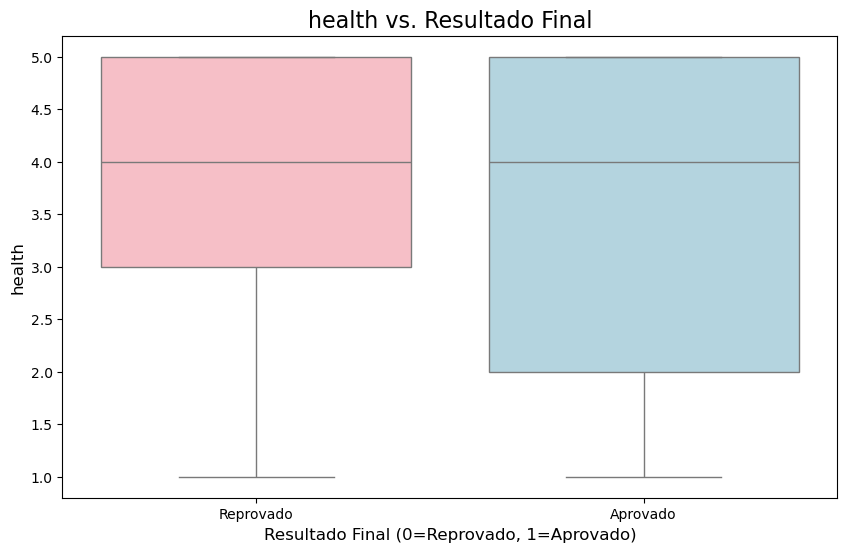


Distribuição de Aprovados/Reprovados por categoria 'sex':


passed,no,yes
sex,,
F,36.057692,63.942308
M,29.411765,70.588235


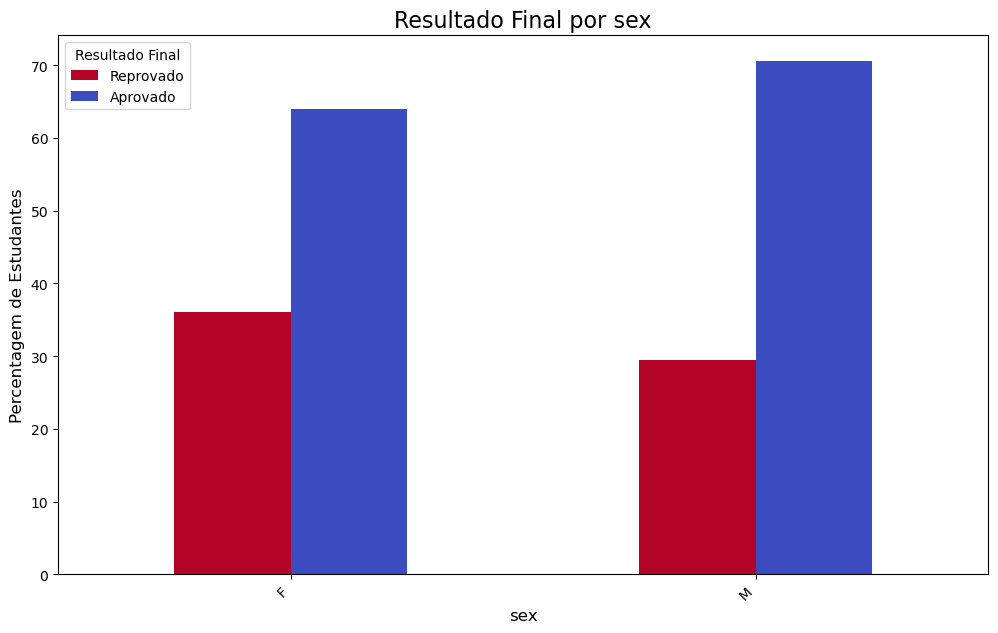


Distribuição de Aprovados/Reprovados por categoria 'Mjob':


passed,no,yes
Mjob,,
at_home,37.288136,62.711864
health,20.588235,79.411765
other,37.588652,62.411348
services,28.155340,71.844660
teacher,32.758621,67.241379


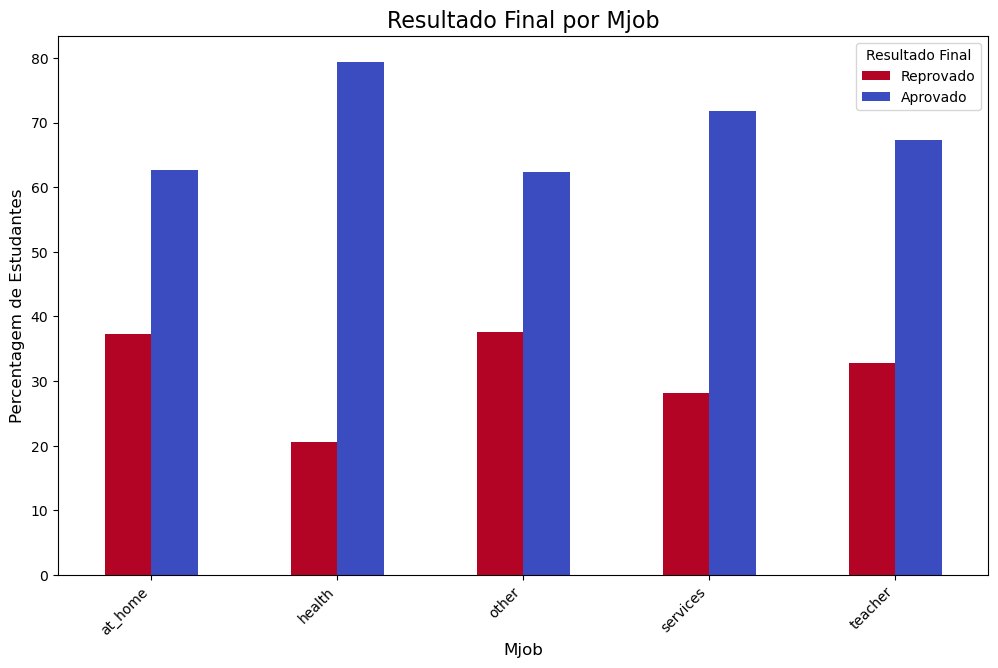


Distribuição de Aprovados/Reprovados por categoria 'Fjob':


passed,no,yes
Fjob,,
at_home,40.000000,60.000000
health,33.333333,66.666667
other,31.797235,68.202765
services,36.036036,63.963964
teacher,24.137931,75.862069


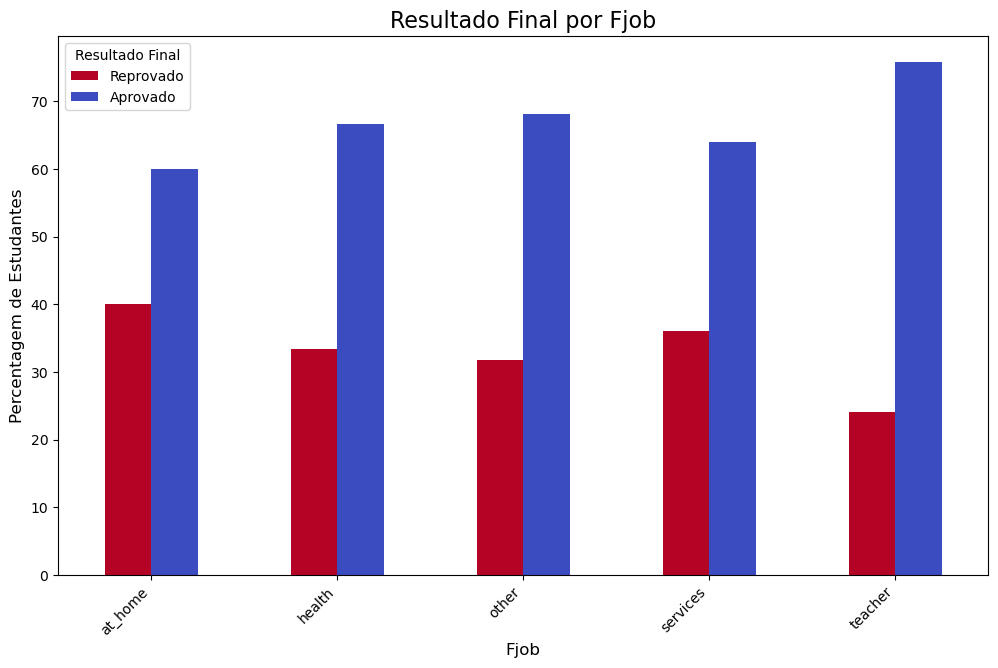


Distribuição de Aprovados/Reprovados por categoria 'reason':


passed,no,yes
reason,,
course,38.620690,61.379310
home,33.027523,66.972477
other,25.000000,75.000000
reputation,27.619048,72.380952


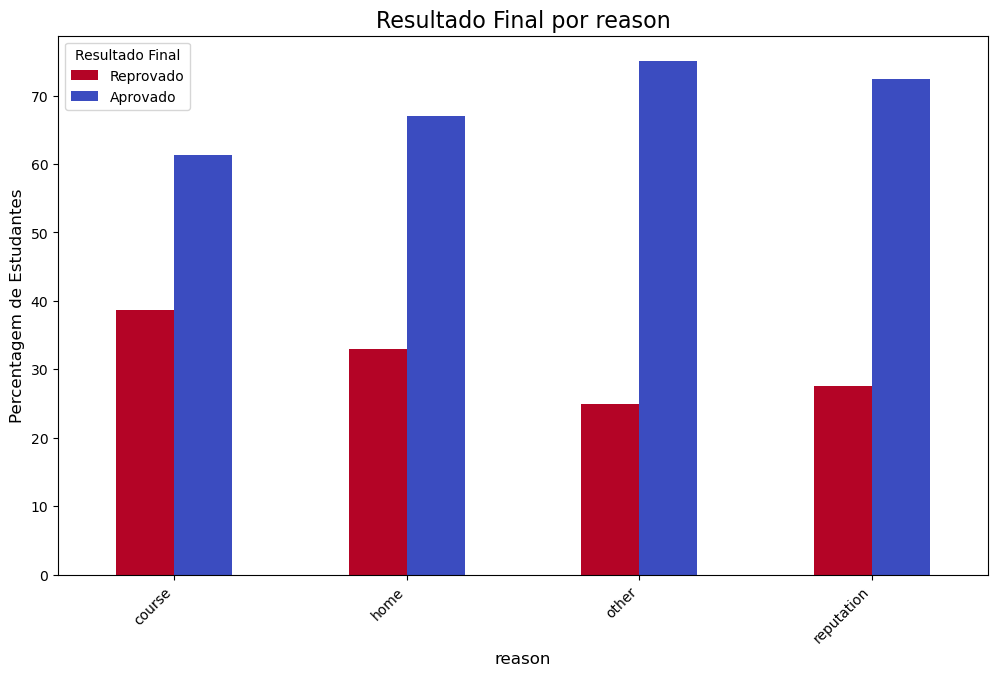


Distribuição de Aprovados/Reprovados por categoria 'schoolsup':


passed,no,yes
schoolsup,,
no,31.104651,68.895349
yes,45.098039,54.901961


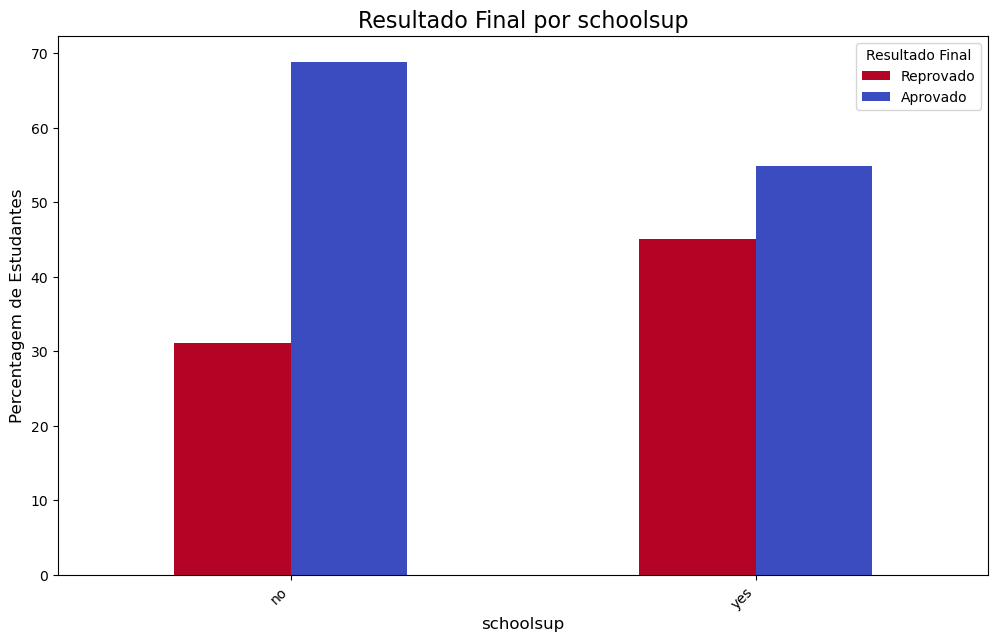


Distribuição de Aprovados/Reprovados por categoria 'higher':


passed,no,yes
higher,,
no,65.0,35.0
yes,31.2,68.8


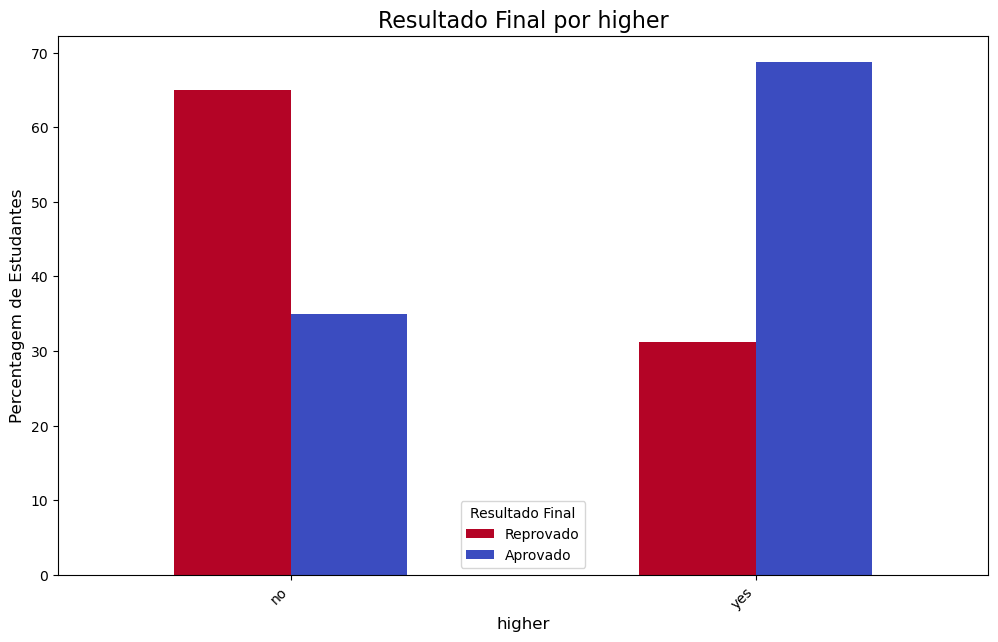


Distribuição de Aprovados/Reprovados por categoria 'romantic':


passed,no,yes
romantic,,
no,29.657795,70.342205
yes,39.393939,60.606061


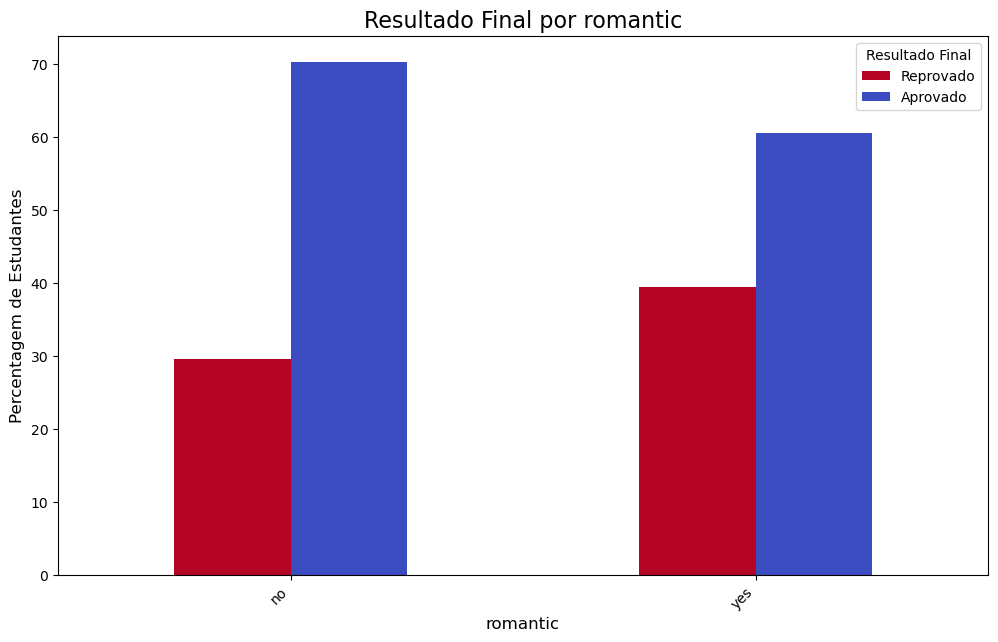


Distribuição de Aprovados/Reprovados por categoria 'internet':


passed,no,yes
internet,,
no,39.393939,60.606061
yes,31.610942,68.389058


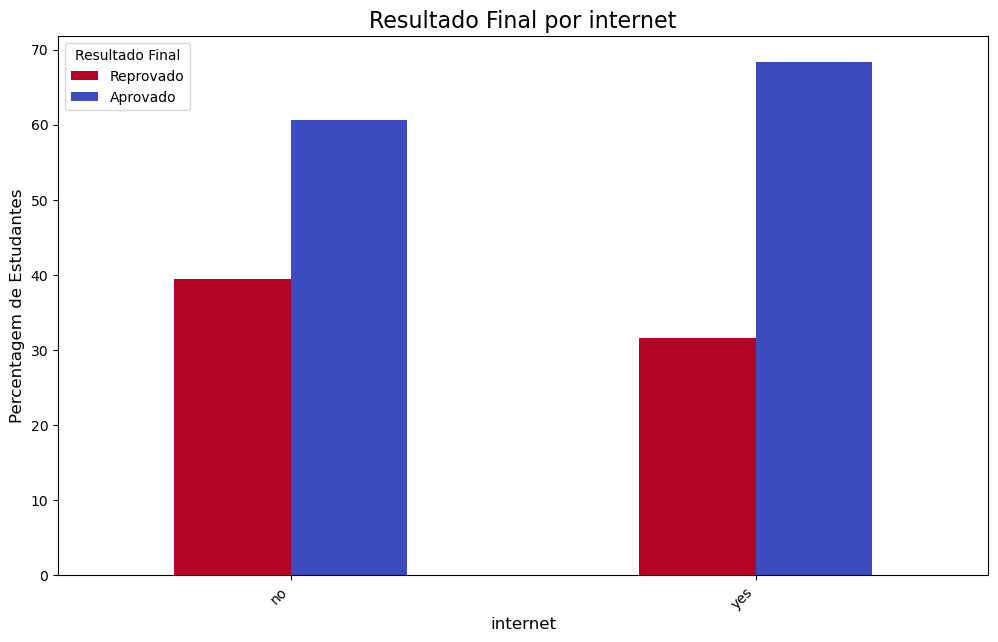


Distribuição de Aprovados/Reprovados por categoria 'address':


passed,no,yes
address,,
R,37.500000,62.500000
U,31.596091,68.403909


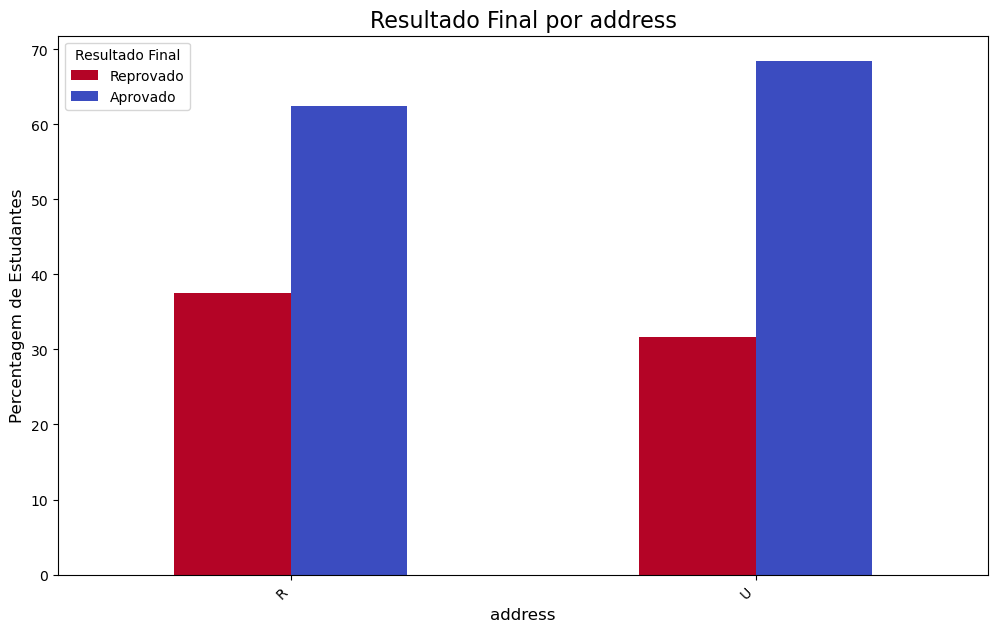


Distribuição de Aprovados/Reprovados por categoria 'school':


passed,no,yes
school,,
GP,32.378223,67.621777
MS,36.956522,63.043478


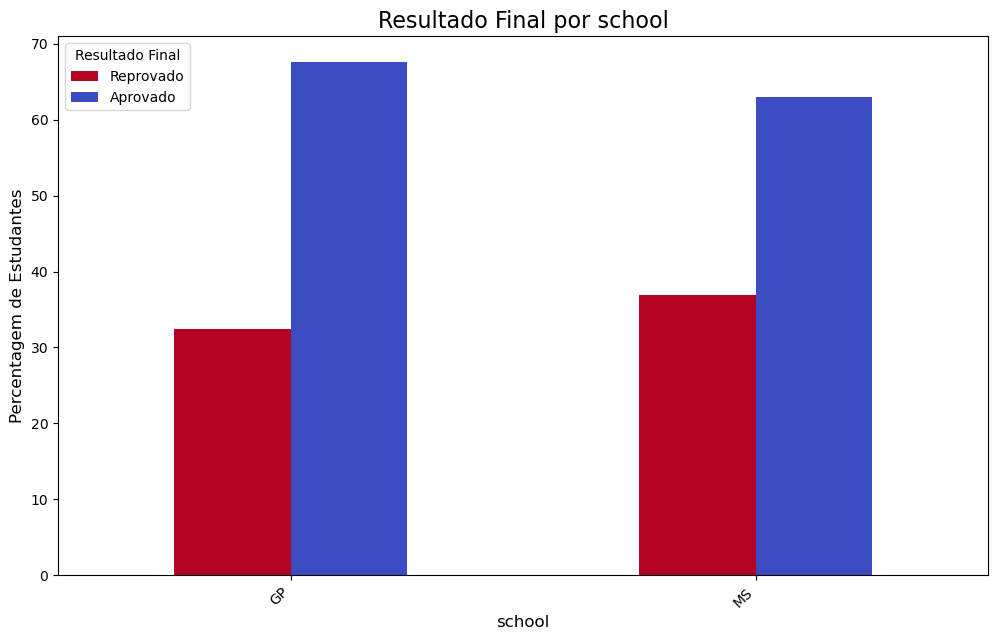


Distribuição de Aprovados/Reprovados por categoria 'guardian':


passed,no,yes
guardian,,
father,27.777778,72.222222
mother,32.600733,67.399267
other,50.000000,50.000000


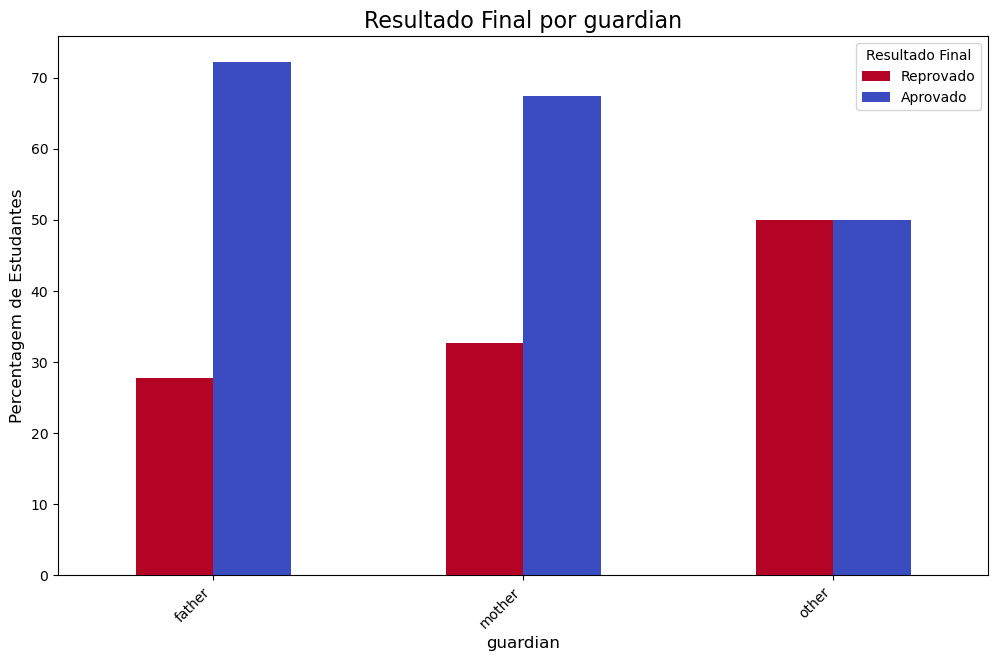


Distribuição de Aprovados/Reprovados por categoria 'famsize':


passed,no,yes
famsize,,
GT3,34.163701,65.836299
LE3,29.824561,70.175439


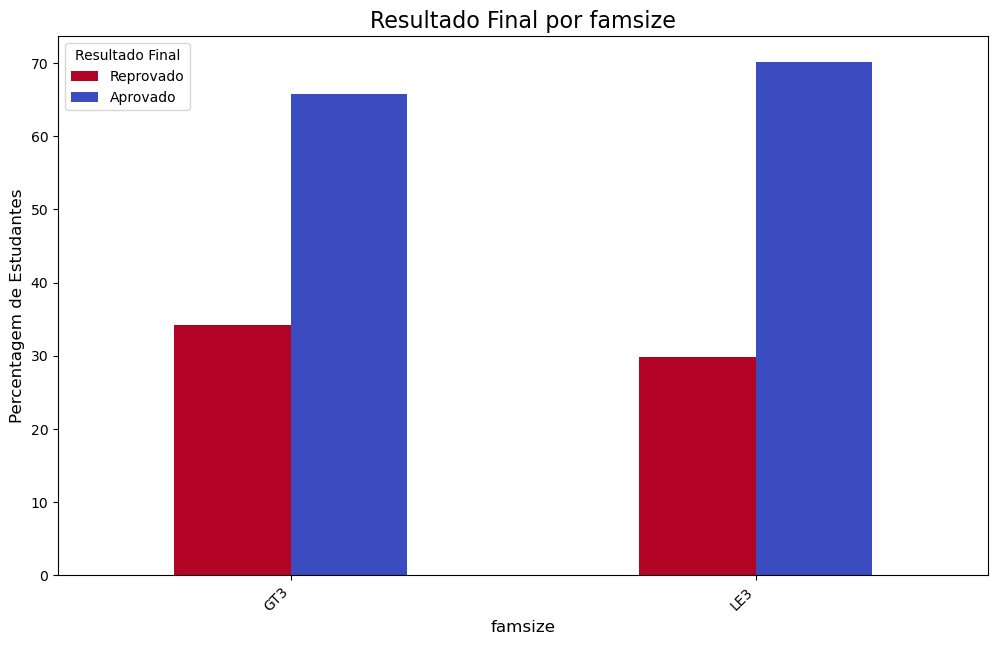


Distribuição de Aprovados/Reprovados por categoria 'famsup':


passed,no,yes
famsup,,
no,29.411765,70.588235
yes,35.123967,64.876033


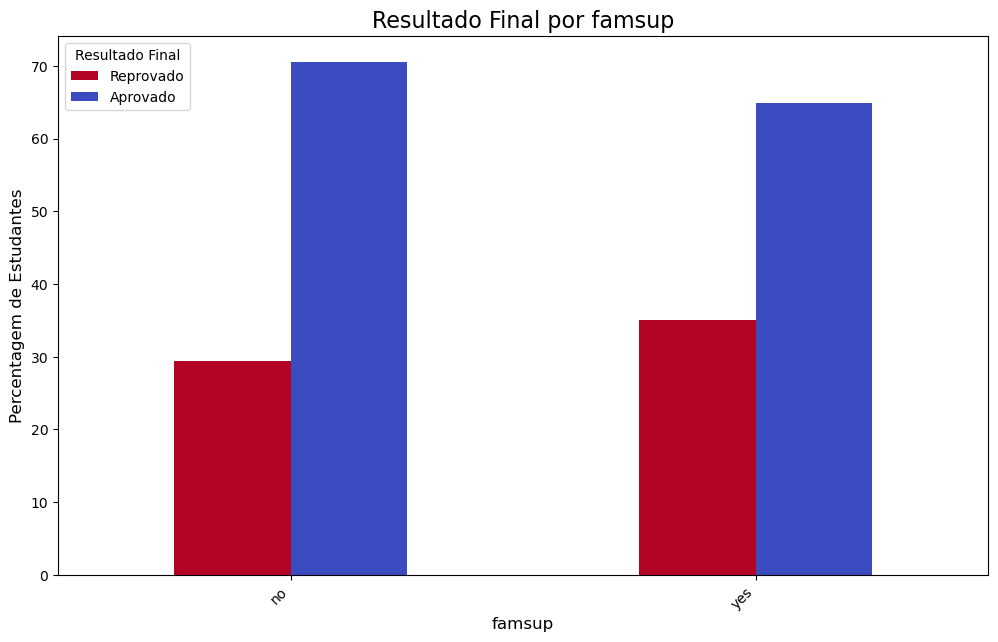


Distribuição de Aprovados/Reprovados por categoria 'paid':


passed,no,yes
paid,,
no,36.915888,63.084112
yes,28.176796,71.823204


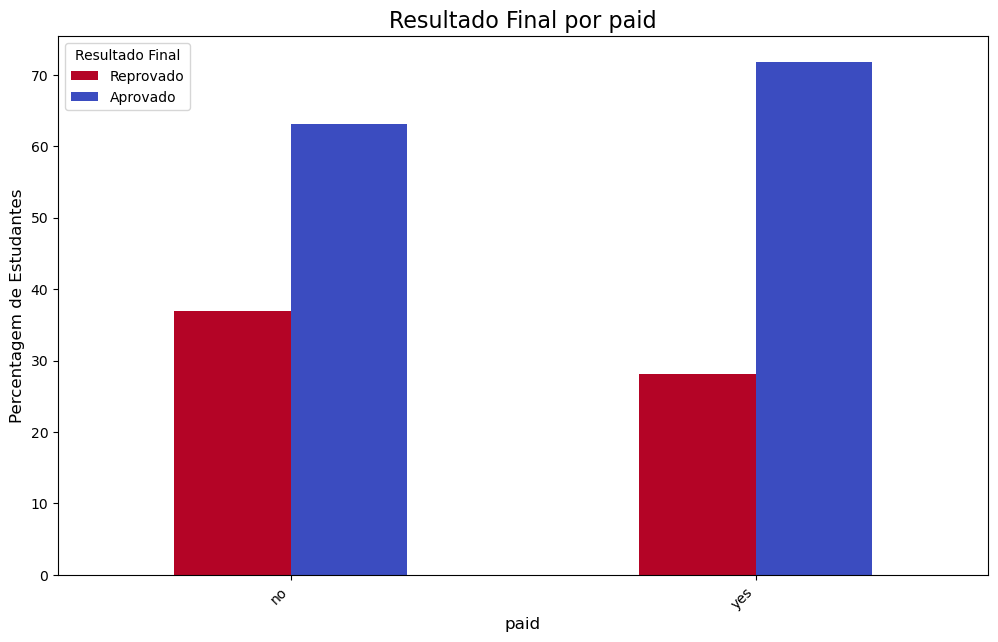


Distribuição de Aprovados/Reprovados por categoria 'activities':


passed,no,yes
activities,,
no,33.505155,66.494845
yes,32.338308,67.661692


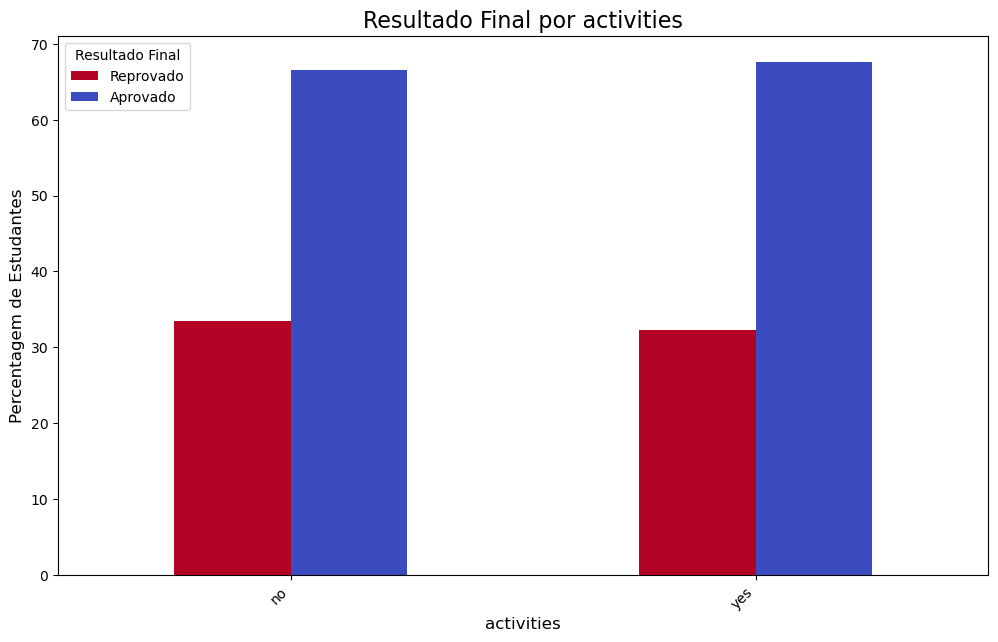


Distribuição de Aprovados/Reprovados por categoria 'nursery':


passed,no,yes
nursery,,
no,32.098765,67.901235
yes,33.121019,66.878981


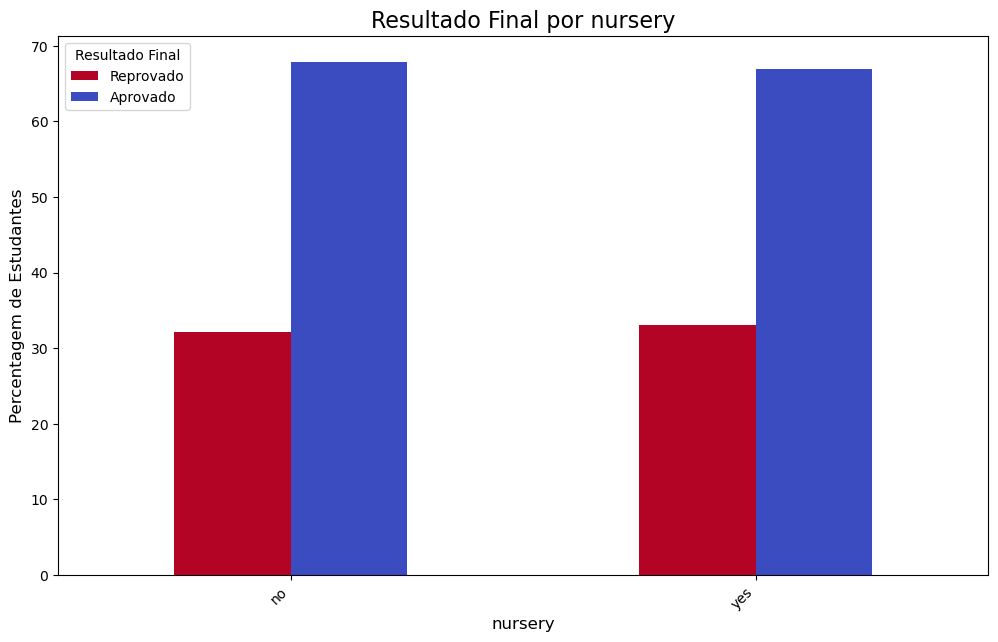


Distribuição de Aprovados/Reprovados por categoria 'higher':


passed,no,yes
higher,,
no,65.0,35.0
yes,31.2,68.8


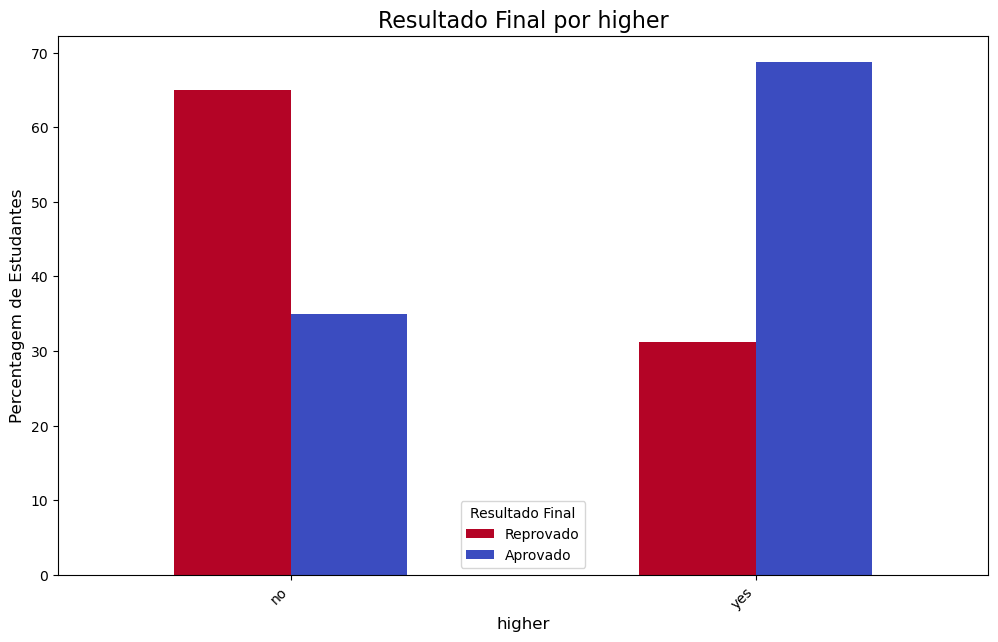

In [30]:
print("\n--- Relação entre Features e a Variável Alvo ('passed') ---")


numerical_cols_to_plot = ['age', 'studytime', 'failures', 'absences', "traveltime", "famrel", "freetime", "goout", "Dalc", "Walc", "health"]
for col in numerical_cols_to_plot:
    if col in data.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='passed', y=col, data=data, palette=['#FFB6C1', '#ADD8E6'], hue='passed', legend=False)
        plt.title(f'{col} vs. Resultado Final', fontsize=16)
        plt.xlabel('Resultado Final (0=Reprovado, 1=Aprovado)', fontsize=12)
        plt.ylabel(col, fontsize=12)
        plt.xticks(ticks=[0, 1], labels=['Reprovado', 'Aprovado'])
        plt.show()

# Features Categóricas vs. Alvo
categorical_cols_to_plot = ['sex', 'Mjob', 'Fjob', 'reason', 'schoolsup', 'higher', 'romantic', 'internet', "address", "school", "guardian", "famsize", "famsup", "paid", "activities", "nursery", "higher"]
for col in categorical_cols_to_plot:
    if col in data.columns:
        # Crosstab para porcentagens
        ct = pd.crosstab(data[col], data['passed'], normalize='index') * 100
        print(f"\nDistribuição de Aprovados/Reprovados por categoria '{col}':")
        display(ct)

        ct.plot(kind='bar', stacked=False, figsize=(12,7), colormap='coolwarm_r')
        plt.title(f'Resultado Final por {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Percentagem de Estudantes', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Resultado Final', labels=['Reprovado', 'Aprovado'])
        plt.show()

**Ausência de Features Irrelevantes** (**Constantes**):
   * Não identificámos nenhuma feature que possua apenas um único valor (constante) em todo o dataset. Isto é positivo, pois significa que todas as features categóricas apresentam alguma variabilidade. **Como resultado desta análise, nenhuma feature será removida ser constante.** Serão mantidas para as fases de pré-processamento e modelagem.

**Identificação de Conceitos Sub-representados**:
   * **Categoria \`A\`** (pais separados) em **'Pstatus'**: minoria significativa.
   * **Categoria \`no\`** (não pretende ensino superior) em **'higher'**: bastante sub-representada.
   * Algumas categorias dentro das features **'Mjob'** e **'Fjob'** também aparecem com baixa frequência.
   * A presença destas categorias minoritárias é um ponto de atenção. **Na fase de pré-processamento, técnicas de balanceamento de classes focadas no alvo serão aplicadas ao conjunto de treino.** Embora o balanceamento se concentre na classe alvo, a sua aplicação pode ajudar indiretamente, ao aumentar a representação da classe minoritária do alvo (reprovados), que pode estar associada a estas categorias.

**Consideração sobre 'higher'**:
* Embora a categoria `no` em **'higher'** seja muito **minoritária**, a nossa análise exploratória da relação entre as features e o alvo ('passed') mostrou que esta categoria, apesar de rara, tem uma forte associação com a reprovação. Portanto, apesar da baixa variância, 'higher' parece ser uma feature potencialmente relevante para a previsão e não deve ser descartada como irrelevante apenas pela sua distribuição. **Com base nesta relevância potencial, a feature 'higher' será mantida e utilizada nas fases de pré-processamento e modelagem.**

#### **Sumário das Inconsistências e Pontos de Atenção**

Após a análise exploratória inicial do dataset, identificámos os seguintes pontos cruciais que informarão as próximas etapas do pipeline de machine learning:

*   **Missing Values**: Nenhum. O dataset não contém valores em falta, o que significa que não é necessário aplicar técnicas de tratamento de missing values, como imputação ou remoção de linhas ou colunas.

*   **Outliers**:
    *   A feature '**absences**' apresenta valores extremos (outliers) que se afastam significativamente da distribuição da maioria dos dados. Estes outliers serão tratados na fase de pré-processamento (através de Capping/Winsorization) para mitigar o seu potencial impacto negativo no desempenho dos modelos preditivos.

*   **Features Irrelevantes (Constantes)**:
    *   Não identificámos nenhuma feature que possua apenas um único valor constante em todo o dataset. Isto é positivo, pois significa que todas as features categóricas apresentam alguma variabilidade. **Como resultado desta análise, nenhuma feature será removida de imediato por ser constante.**

*   **Identificação de Conceitos Sub-representados**:
    *   **Na variável alvo ('passed')**: Observámos um desbalanceamento significativo, com a classe 'Reprovado' sendo minoritária. Este é um ponto de atenção crucial, pois pode levar a modelos enviesados. **Na fase de pré-processamento, técnicas de balanceamento de classes (SMOTE, Random Over/Under Sampling) serão aplicadas ao conjunto de treino para mitigar este problema.** A avaliação dos modelos focar-se-á em métricas adequadas para datasets desbalanceados, como Recall para a classe minoritária e F1-Score.
    *   **Features categóricas**: Algumas categorias aparecem com baixa frequência (ex: categoria `A` em 'Pstatus', categoria `no` em 'higher', e algumas profissões em 'Mjob'/'Fjob'). Embora minoritárias, a análise da relação entre 'higher' e o alvo demonstrou a sua potencial relevância. **Estas features serão mantidas e utilizadas nas fases de pré-processamento e modelagem.**

*   **Correlação entre Features Numéricas (Redundância Potencial)**:
    *   Identificámos correlações notáveis entre pares de features numéricas (ex: 'Medu' vs 'Fedu', 'Dalc' vs 'Walc'). Embora não sejam extremas, estas correlações sugerem alguma redundância potencial. **Durante a fase de engenharia de features, exploraremos a criação de novas variáveis que combinem a informação destas features correlacionadas**, o que pode ajudar a simplificar o modelo e potencialmente melhorar o desempenho, especialmente com modelos sensíveis à colineariedade.

## **Data Preparation: Cleaning, Transformation and Feature Engineering**

Após a análise exploratória aprofundada, focamo-nos agora na **limpeza**, **pré-processamento** e **engenharia de features**. Estas etapas são **cruciais** para preparar o dataset, garantindo que os dados estejam no **formato** e **qualidade ideais** para a modelagem de *machine learning*.

### **Tratamento de Outliers**

Vamos utilizar o método de **Capping/Winsorization** que limita os valores extremos a um certo percentil:

<Axes: >

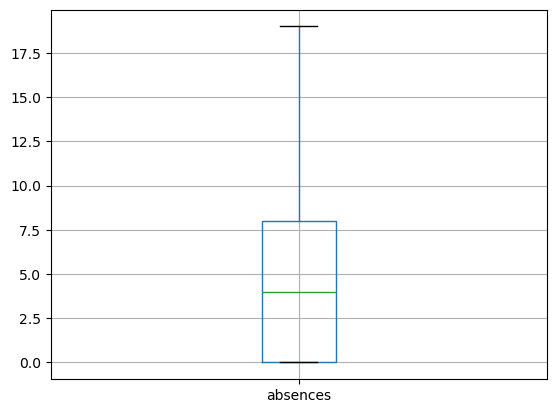

In [31]:
data['absences'] = stats.mstats.winsorize(data['absences'], limits=[0.05, 0.05])
data.boxplot(column=['absences'])

### **Feature Engeneering**

Vamos criar variáveis derivadas que podem capturar melhor as relações entre as variáveis existentes e a variável alvo, além de potencialmente melhorar o desempenho dos modelos.

In [32]:
data_fe = data.copy()
data_fe['parents_edu'] = (data_fe['Medu'] + data_fe['Fedu'])
data_fe['total_alcohol'] = data_fe['Dalc'] + data_fe['Walc']
data_fe['absences_bin'] = (data_fe['absences'] > 10).astype(int)
data_fe['failures_bin'] = (data_fe['failures'] > 0).astype(int)
data_fe['alcohol_high'] = (data_fe['total_alcohol'] >= 3).astype(int)
data_fe['studytime_low'] = (data_fe['studytime'] == 1).astype(int)
data_fe['other_guardian'] = (data_fe['guardian'] == 'other').astype(int)
data_fe['esup'] = ((data_fe['schoolsup'] == 'yes') | (data_fe['famsup'] == 'yes')).astype(int)
data_fe['study_lifestyle_ratio'] = data_fe['studytime'] / (data_fe['freetime'] + data_fe['goout'])



features_to_cut = [
    'Medu', 'Fedu', 'Dalc', 'Walc', 'guardian', 'schoolsup', 'famsup',
    'traveltime', 'freetime', 'activities', 'total_alcohol', 'failures', 'absences', 'studytime', 'goout'
]
data_fe = data_fe.drop(features_to_cut, axis=1)
features_to_cut.remove('total_alcohol')

print(f"Features retiradas: \n{features_to_cut}")
print("Novas features criadas:")
print(['parents_edu', 'absences_bin', 'failures_bin', 'alcohol_high', 'studytime_low', 'other_guardian', 'esup', 'study_lifestyle_ratio'])
display(data_fe[['parents_edu', 'absences_bin', 'failures_bin', 'alcohol_high', 'studytime_low', 'other_guardian', 'esup', 'study_lifestyle_ratio', ]].head())

Features retiradas: 
['Medu', 'Fedu', 'Dalc', 'Walc', 'guardian', 'schoolsup', 'famsup', 'traveltime', 'freetime', 'activities', 'failures', 'absences', 'studytime', 'goout']
Novas features criadas:
['parents_edu', 'absences_bin', 'failures_bin', 'alcohol_high', 'studytime_low', 'other_guardian', 'esup', 'study_lifestyle_ratio']


,parents_edu,absences_bin,failures_bin,alcohol_high,studytime_low,other_guardian,esup,study_lifestyle_ratio
0,8,0,0,0,0,0,1,0.285714
1,2,0,0,0,0,0,1,0.333333
2,2,0,1,1,0,0,1,0.400000
3,6,0,0,0,0,0,1,0.750000
4,6,0,0,1,0,0,1,0.400000


In [33]:
data_train, data_test = sklearn.model_selection.train_test_split(data, test_size=0.2, random_state=100)
data_fe_train, data_fe_test = sklearn.model_selection.train_test_split(data_fe, test_size=0.2, random_state=100)

### **Transformação de dados qualitativos em dados quantitativos**

Transformamos atributos qualitativos (como 'sexo', 'endereço') em **representações numéricas** para que os algoritmos de *machine learning* possam processá-los:

In [34]:
# Encoding para o dataset sem feature engineering
le = sklearn.preprocessing.LabelEncoder()
data_train_en = data_train.copy()
data_test_en = data_test.copy()
data_en = data.copy()
collumns_to_encode = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for col in collumns_to_encode:
    le.fit(data_train[col])
    data_train_en[col] = le.transform(data_train[col])
    data_test_en[col] = le.transform(data_test[col])
    data_en[col] = le.transform(data[col])

data_train_en['passed'] = data_train['passed'].map(lambda x: 1 if x == 'yes' else 0)
data_test_en['passed'] = data_test['passed'].map(lambda x: 1 if x == 'yes' else 0)
data_en['passed'] = data['passed'].map(lambda x: 1 if x == 'yes' else 0)

# Encoding para o dataset com feature engineering
data_fe_train_en = data_fe_train.copy()
data_fe_test_en = data_fe_test.copy()
data_fe_en = data_fe.copy()
collumns_to_encode = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'higher', 'internet', 'romantic', 'nursery', 'paid']
for col in collumns_to_encode:
    le.fit(data_fe_train[col])
    data_fe_train_en[col] = le.transform(data_fe_train[col])
    data_fe_test_en[col] = le.transform(data_fe_test[col])
    data_fe_en[col] = le.transform(data_fe[col])

data_fe_train_en['passed'] = data_fe_train['passed'].map(lambda x: 1 if x == 'yes' else 0)
data_fe_test_en['passed'] = data_fe_test['passed'].map(lambda x: 1 if x == 'yes' else 0)
data_fe_en['passed'] = data_fe['passed'].map(lambda x: 1 if x == 'yes' else 0)

### **Data Scaling**

Na seguinte célula, realizamos o **escalonamento** (normalização) dos dados utilizando o **MinMaxScaler**. Este processo transforma todas as features numéricas para o **mesmo intervalo** (entre 0 e 1), o que é fundamental para garantir que todas as variáveis tenham o mesmo peso durante o treino dos modelos de machine learning, evitando que atributos com valores mais altos dominem o processo de aprendizagem.

In [35]:
# Scaling para o dataset sem feature engeneering
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(data_train_en.drop('passed', axis=1))
data_train_sc = pd.DataFrame(scaler.transform(data_train_en.drop('passed', axis=1)),columns=data_train_en.drop('passed', axis=1).columns,index=data_train_en.index)
data_test_sc = pd.DataFrame(scaler.transform(data_test_en.drop('passed', axis=1)),columns=data_test_en.drop('passed', axis=1).columns,index=data_test_en.index)
data_sc = pd.DataFrame(scaler.transform(data_en.drop('passed', axis=1)),columns=data_en.drop('passed', axis=1).columns,index=data_en.index)
data_train_sc['passed'] = data_train_en['passed']
data_test_sc['passed'] = data_test_en['passed']
data_sc['passed'] = data_en['passed']

# Scaling para o dataset com feature engeneering
scaler.fit(data_fe_train_en.drop('passed', axis=1))
data_fe_train_sc = pd.DataFrame(scaler.transform(data_fe_train_en.drop('passed', axis=1)),columns=data_fe_train_en.drop('passed', axis=1).columns,index=data_fe_train_en.index)
data_fe_test_sc = pd.DataFrame(scaler.transform(data_fe_test_en.drop('passed', axis=1)),columns=data_fe_test_en.drop('passed', axis=1).columns,index=data_fe_test_en.index)
data_fe_sc = pd.DataFrame(scaler.transform(data_fe_en.drop('passed', axis=1)),columns=data_fe_en.drop('passed', axis=1).columns,index=data_fe_en.index)
data_fe_train_sc['passed'] = data_fe_train_en['passed']
data_fe_test_sc['passed'] = data_fe_test_en['passed']
data_fe_sc['passed'] = data_fe_en['passed']

### **Correlação do Dataset Pré-processado**

Para entender como as features se relacionam entre si, especialmente após o pré-processamento, examinaremos a **matriz de correlação**, e em seguida, destacaremos as correlações com a variável alvo '**passed**'.

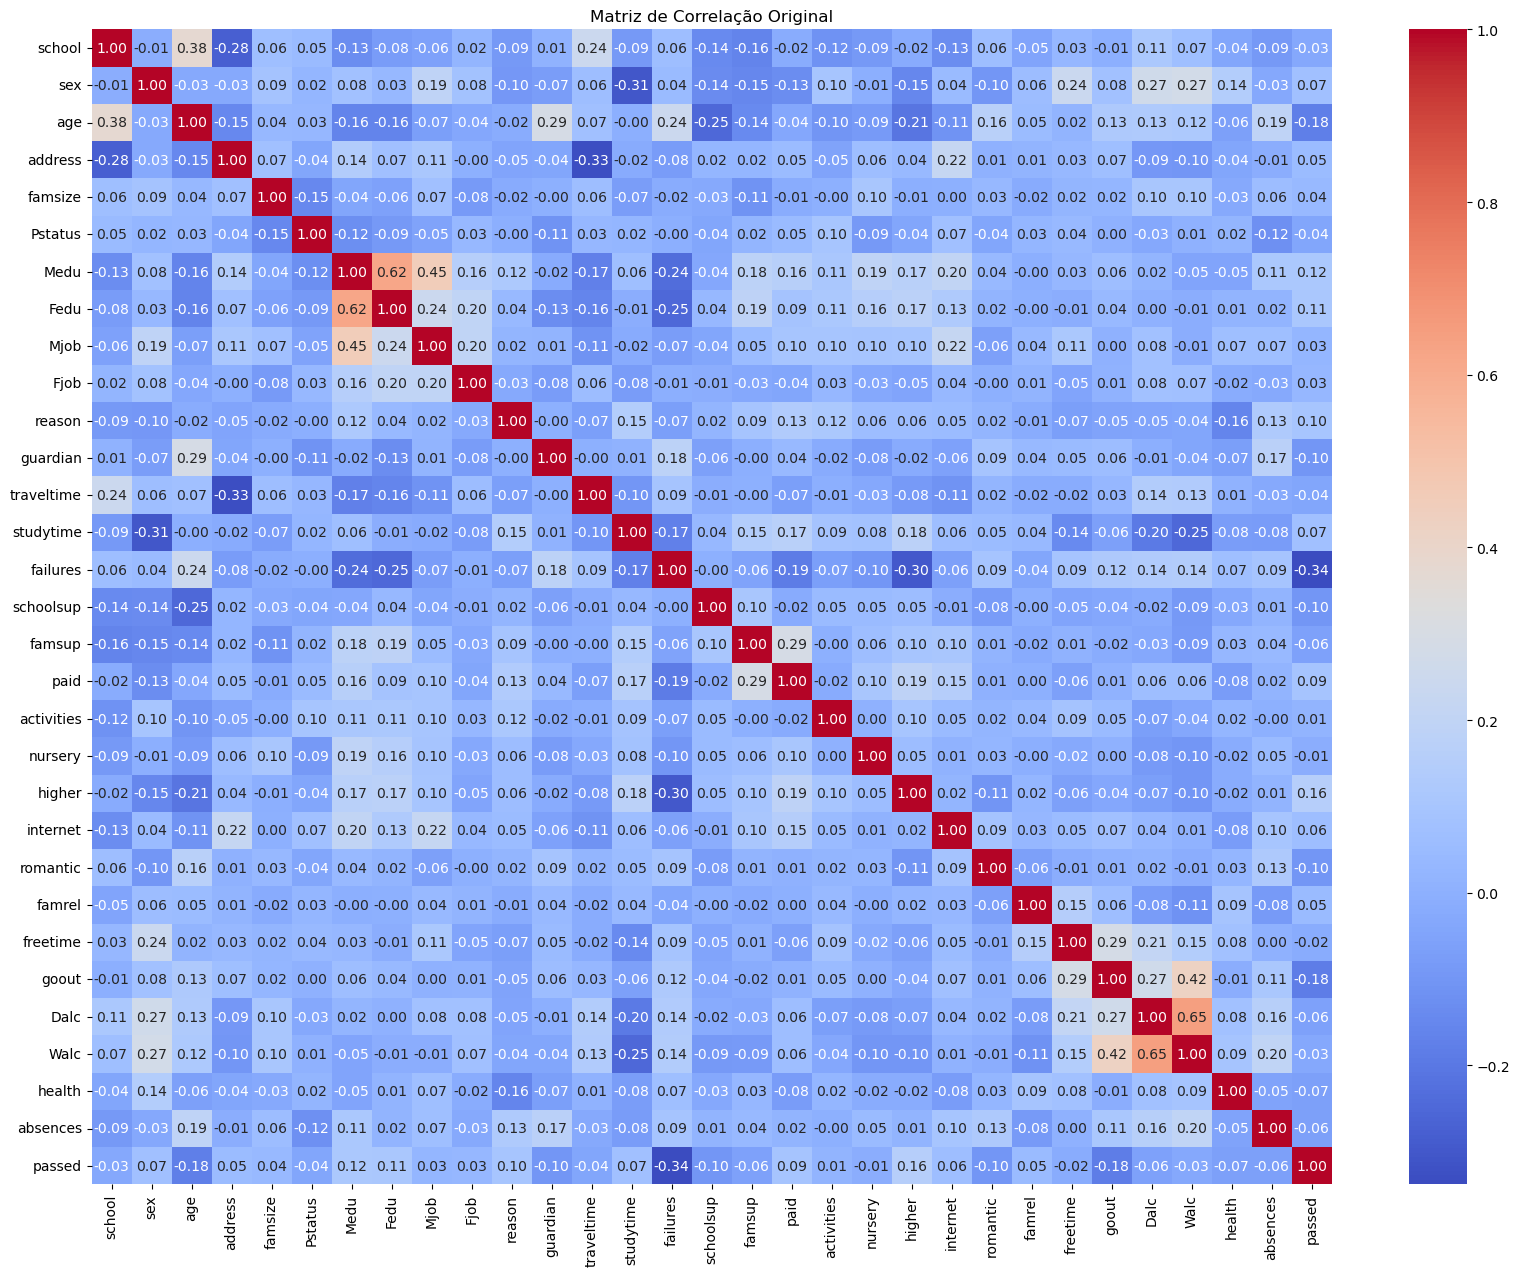

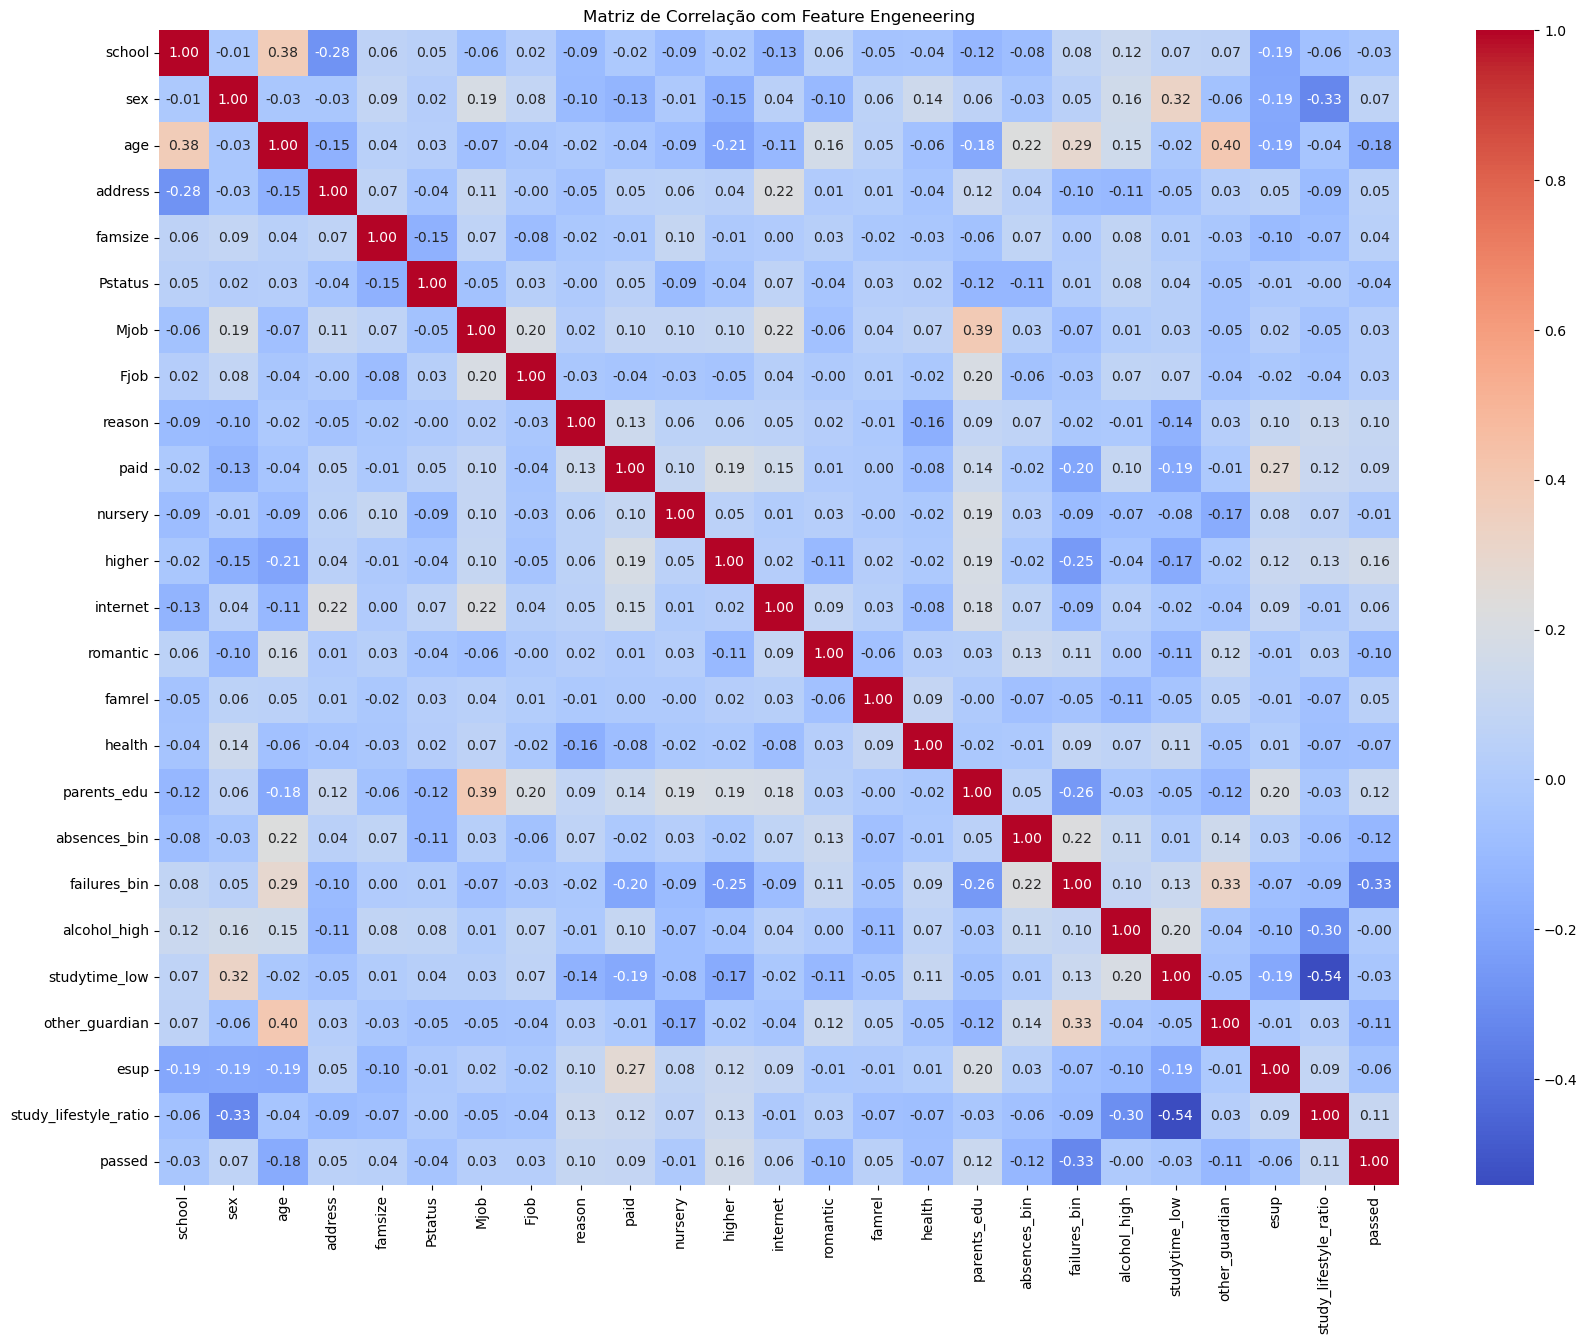

In [36]:
correlation_matrix = data_sc.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação Original')
plt.show()
correlation_matrix = data_fe_sc.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação com Feature Engeneering')
plt.show()

Esta análise visual e numérica ajuda-nos a **compreender a interdependência** entre as variáveis e a sua relevância para a previsão do resultado final ('passed').

## **Data Modeling (Supervised Learning)**

Nesta seção, aplicaremos técnicas de **aprendizagem supervisionada** para construir modelos capazes de **prever** se um aluno será **aprovado** ou **reprovado**.

### **Divisão de teste e treino**

Começamos por determinal qual coluna do nosso dataset representa o resultado que o modelo de machine learning deverá aprender a prever — '**passed**' — separando os dados pré-processados em **variáveis de entrada** (**X**) e a **variável a prever** (**y**):

In [37]:
X_train = data_train_sc.drop('passed', axis=1)
X_test = data_test_sc.drop('passed', axis=1)
y_train = data_train_sc['passed']
y_test = data_test_sc['passed']

X_fe_train = data_fe_train_sc.drop('passed', axis=1)
X_fe_test = data_fe_test_sc.drop('passed', axis=1)
y_fe_train = data_fe_train_sc['passed']
y_fe_test = data_fe_test_sc['passed']

Vamos analisar a distribuição da variável alvo ('passed') para **verificar** se o dataset está **balanceado**:

In [38]:
print("Conceito Alvo (Target): 'passed'")
print("\nTipo de Tarefa: Classificação Binária")
print("Distribuição do Alvo no dataset pré-processado (y):")
print(data_sc['passed'].value_counts(normalize=True) * 100)
is_imbalanced = (data_sc['passed'].value_counts(normalize=True).min() < 0.35)
if is_imbalanced:
    print("ALERTA: O dataset parece desbalanceado. Considerar técnicas de balanceamento.")
else:
    print("\nO dataset parece estar razoavelmente balanceado.")

Conceito Alvo (Target): 'passed'

Tipo de Tarefa: Classificação Binária
Distribuição do Alvo no dataset pré-processado (y):
passed
1    67.088608
0    32.911392
Name: proportion, dtype: float64
ALERTA: O dataset parece desbalanceado. Considerar técnicas de balanceamento.


### **Balanceamento do Dataset**

Como identificado anteriormente, a variável alvo ('passed') está **desbalanceada**, com uma proporção significativamente maior de alunos aprovados em relação aos reprovados. Esse desbalanceamento pode prejudicar o desempenho dos modelos de classificação, tornando-os tendenciosos para a classe maioritária.

Para mitigar esse problema, aplicamos três técnicas de balanceamento no conjunto de treino:

- **SMOTE (Synthetic Minority Over-sampling Technique):** Gera exemplos sintéticos da classe minoritária, criando novos registros "artificiais" a partir de combinações dos existentes, aumentando assim a representatividade da classe menos frequente sem simplesmente duplicar exemplos.

- **Oversampling Aleatório:** Duplica aleatoriamente exemplos da classe minoritária até igualar o número de exemplos da classe maioritária.

- **Undersampling Aleatório:** Remove aleatoriamente exemplos da classe maioritária até igualar o número de exemplos da classe minoritária.

Essas abordagens permitem treinar modelos mais justos, que aprendem a reconhecer ambas as classes de forma equilibrada, melhorando a capacidade de identificar corretamente tanto alunos aprovados quanto reprovados.

In [39]:
smote = imblearn.over_sampling.SMOTE(random_state=1)
X_atrain_s, y_atrain_s = smote.fit_resample(X_train, y_train)
print("Oversampling (SMOTE) concluído.")
print(f"Shape de X_train_resampled: {X_atrain_s.shape}, Shape de y_train_resampled: {y_atrain_s.shape}")
print("\nNova distribuição do alvo em y_train_resampled:")
print(y_atrain_s.value_counts(normalize=True) * 100)

Oversampling (SMOTE) concluído.
Shape de X_train_resampled: (410, 30), Shape de y_train_resampled: (410,)

Nova distribuição do alvo em y_train_resampled:
passed
1    50.0
0    50.0
Name: proportion, dtype: float64


In [40]:
ros = imblearn.over_sampling.RandomOverSampler(random_state=1)
X_atrain_ros, y_atrain_ros = ros.fit_resample(X_train, y_train)
print("Random Over Sampling concluído.")
print(f"Shape de X_train_resampled: {X_atrain_ros.shape}, Shape de y_train_resampled: {y_atrain_ros.shape}")
print("\nNova distribuição do alvo em y_train_resampled:")
print(y_atrain_ros.value_counts(normalize=True) * 100)

Random Over Sampling concluído.
Shape de X_train_resampled: (410, 30), Shape de y_train_resampled: (410,)

Nova distribuição do alvo em y_train_resampled:
passed
1    50.0
0    50.0
Name: proportion, dtype: float64


In [41]:
rus = imblearn.under_sampling.RandomUnderSampler(random_state=1)
X_atrain_rus, y_atrain_rus = rus.fit_resample(X_train, y_train)
print("Random Under Sampling concluído.")
print(f"Shape de X_train_resampled: {X_atrain_rus.shape}, Shape de y_train_resampled: {y_atrain_rus.shape}")
print("\nNova distribuição do alvo em y_train_resampled:")
print(y_atrain_rus.value_counts(normalize=True) * 100)

Random Under Sampling concluído.
Shape de X_train_resampled: (222, 30), Shape de y_train_resampled: (222,)

Nova distribuição do alvo em y_train_resampled:
passed
0    50.0
1    50.0
Name: proportion, dtype: float64


### **Seleção, Treinamento e Avaliação Inicial de Algoritmos de Aprendizagem**

Vamos explorar vários **classificadores** do **scikit-learn** para prever o sucesso dos alunos. Selecionamos os seguintes modelos:
* Regressão Logística
* Árvore de Decisão
* KNN (K-Nearest Neighbors)
* Random Forest
* Gradient Boosting
* Nayve Bayes (GaussianNB)
* SVM (Support Vector Machine)

Para cada modelo, faremos um **treinamento inicial** e uma avaliação no conjunto de teste para ter uma estimativa robusta da **performance**.

Para avaliar o desempenho dos modelos, utilizaremos as seguintes **métricas de avaliação**:

*   **Accuracy:** Proporção de previsões corretas. Representa a percentagem total de alunos (aprovados e reprovados) cuja situação final o modelo previu corretamente. No entanto, esta métrica **pode ser enganosa** em datasets desbalanceados como o nosso, onde acertar a classe maioritária (aprovados) é mais fácil e pode mascarar um mau desempenho na classe minoritária (reprovados).
*   **Precisão (Precision):** Mede, dos alunos que o modelo previu como **reprovados** (ou aprovados, dependendo de qual classe estamos a focar), quantos realmente reprovaram (ou aprovaram). Uma alta precisão para a classe "Reprovado" significa que, quando o modelo diz que um aluno vai reprovar, ele está geralmente certo. (TP / (TP + FP))
*   **Revocação (Recall):** Mede, dos alunos que **realmente reprovaram** (ou aprovaram), quantos foram corretamente identificados pelo modelo. Para a classe "Reprovado", um alto recall é **crucial**, pois significa que o modelo está a conseguir detetar a maioria dos alunos que estão em risco de reprovar, permitindo a intervenção. (TP / (TP + FN))
*   **F1-Score:** É a média harmónica entre a precisão e o recall. Fornece uma medida única que tenta equilibrar estas duas métricas. É particularmente **útil para avaliar o desempenho em classes desbalanceadas**, pois considera tanto os falsos positivos quanto os falsos negativos, dando uma visão mais completa do desempenho do modelo na classe de interesse.
*   **ROC AUC (Area Under the Receiver Operating Characteristic Curve):** Mede a capacidade geral do modelo de distinguir entre as classes "Reprovado" e "Aprovado". Um valor de AUC mais alto indica que o modelo é melhor a diferenciar alunos das duas classes. É uma métrica **robusta para datasets desbalanceados**, pois não é diretamente influenciada pela proporção das classes.


Para o objetivo do nosso Sistema de Intervenção a Estudantes, o **Recall_0** é a métrica mais crítica, pois focamo-nos em identificar o maior número possível de alunos em risco.

In [42]:
models_to_test = []
models_to_test = [
    (sklearn.linear_model.LogisticRegression(random_state=100, solver='liblinear', max_iter=300), "Regressão Logística"),
    (sklearn.tree.DecisionTreeClassifier(random_state=100), "Árvore de Decisão"),
    (sklearn.neighbors.KNeighborsClassifier(), "KNN (K-Nearest Neighbors)"),
    (sklearn.ensemble.RandomForestClassifier(random_state=100, n_estimators=200), "Random Forest"),
    (sklearn.ensemble.GradientBoostingClassifier(random_state=100, n_estimators=200), "Gradient Boosting"),
    (sklearn.naive_bayes.GaussianNB(), "Naive Bayes (Gaussian)"),
    (sklearn.svm.SVC(probability=True, random_state=100), "SVM (Support Vector Machine)"),
]

def avaliar_varios_modelos_holdout(models_to_test, X_train, y_train, X_test, y_test):
    resultados = []
    for model, name in models_to_test:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
        metrics = {
            "Modelo": name,
            "Accuracy": sklearn.metrics.accuracy_score(y_test, y_pred),
            "Precision (macro)": sklearn.metrics.precision_score(y_test, y_pred, average='macro', zero_division=0),
            "Recall_0": sklearn.metrics.recall_score(y_test, y_pred, pos_label=0, zero_division=0),
            "Recall_1": sklearn.metrics.recall_score(y_test, y_pred, pos_label=1, zero_division=0),
            "F1_0": sklearn.metrics.f1_score(y_test, y_pred, pos_label=0, zero_division=0),
            "F1_1": sklearn.metrics.f1_score(y_test, y_pred, pos_label=1, zero_division=0),
            "ROC AUC": sklearn.metrics.roc_auc_score(y_test, y_proba) if y_proba is not None else None
        }
        resultados.append(metrics)
        #print(f"\nMatriz de Confusão ({name}):\n", sklearn.metrics.confusion_matrix(y_test, y_pred))
    resultados_df = pd.DataFrame(resultados).set_index("Modelo")
    return resultados_df

## **Performance Evaluation**

### **Cenários de Comparação**

Para demonstrar o **impacto** das diferentes etapas do nosso pipeline, **avaliaremos os modelos** nos seguintes **cenários**. Para cada cenário, utilizaremos o mesmo conjunto de algoritmos de classificação para uma comparação justa.

#### **Cenário Base: Sem Engenharia de Features e Sem Balanceamento**

Este cenário serve como **referência inicial** para avaliar os modelos. Utilizamos o dataset após a **limpeza básica**, sem aplicar engenharia de features ou técnicas de balanceamento de classes.

In [43]:
resultado_base = avaliar_varios_modelos_holdout(models_to_test, X_train, y_train, X_test, y_test)
display(resultado_base.sort_values(by='Recall_0', ascending=False))

,Accuracy,Precision (macro),Recall_0,Recall_1,F1_0,F1_1,ROC AUC
Modelo,,,,,,,
Árvore de Decisão,0.658228,0.636305,0.736842,0.633333,0.509091,0.737864,0.685088
Gradient Boosting,0.734177,0.673319,0.684211,0.750000,0.553191,0.810811,0.746491
Naive Bayes (Gaussian),0.772152,0.692939,0.578947,0.833333,0.550000,0.847458,0.710526
Regressão Logística,0.746835,0.660509,0.526316,0.816667,0.500000,0.830508,0.764035
KNN (K-Nearest Neighbors),0.670886,0.575699,0.421053,0.750000,0.380952,0.775862,0.539912
Random Forest,0.759494,0.662698,0.421053,0.866667,0.457143,0.845528,0.777193
SVM (Support Vector Machine),0.797468,0.729947,0.368421,0.933333,0.466667,0.875000,0.789474


#### **Cenário com Balanceamento de Classes (Sem Engenharia de Features)**

Neste cenário, avaliamos o impacto direto das **técnicas de balanceamento** de classes (SMOTE, Random Over Sampling e Random Under Sampling). Os dados utilizados são os originais (sem engenharia de features) e a técnica de balanceamento foi aplicada apenas no conjunto de treino.

In [44]:
from IPython.display import Markdown
resultado_smote = avaliar_varios_modelos_holdout(models_to_test, X_atrain_s, y_atrain_s, X_test, y_test)
display(Markdown("## SMOTE"))
display(resultado_smote.sort_values(by='Recall_0', ascending=False))
resultado_ros = avaliar_varios_modelos_holdout(models_to_test, X_atrain_ros, y_atrain_ros, X_test, y_test)
print()
print()
display(Markdown("## Random Over Sampling"))
display(resultado_ros.sort_values(by='Recall_0', ascending=False))
resultado_rus = avaliar_varios_modelos_holdout(models_to_test, X_atrain_rus, y_atrain_rus, X_test, y_test)
print()
print()
display(Markdown("## Random Under Sampling"))
display(resultado_rus.sort_values(by='Recall_0', ascending=False))

## SMOTE

,Accuracy,Precision (macro),Recall_0,Recall_1,F1_0,F1_1,ROC AUC
Modelo,,,,,,,
KNN (K-Nearest Neighbors),0.481013,0.570157,0.789474,0.383333,0.422535,0.528736,0.605702
Regressão Logística,0.645570,0.605731,0.631579,0.650000,0.461538,0.735849,0.752632
Gradient Boosting,0.658228,0.601701,0.578947,0.683333,0.448980,0.752294,0.704386
Árvore de Decisão,0.721519,0.637034,0.526316,0.783333,0.476190,0.810345,0.654825
Naive Bayes (Gaussian),0.734177,0.648325,0.526316,0.800000,0.487805,0.820513,0.639474
Random Forest,0.759494,0.668033,0.473684,0.850000,0.486486,0.842975,0.787719
SVM (Support Vector Machine),0.620253,0.555172,0.473684,0.666667,0.375000,0.727273,0.701754


## Random Over Sampling

,Accuracy,Precision (macro),Recall_0,Recall_1,F1_0,F1_1,ROC AUC
Modelo,,,,,,,
Regressão Logística,0.607595,0.597882,0.684211,0.583333,0.456140,0.693069,0.722807
KNN (K-Nearest Neighbors),0.582278,0.585577,0.684211,0.550000,0.440678,0.666667,0.560965
Naive Bayes (Gaussian),0.772152,0.692939,0.578947,0.833333,0.550000,0.847458,0.700000
SVM (Support Vector Machine),0.594937,0.553689,0.526316,0.616667,0.384615,0.698113,0.657018
Random Forest,0.734177,0.648325,0.526316,0.800000,0.487805,0.820513,0.749561
Gradient Boosting,0.645570,0.570513,0.473684,0.700000,0.391304,0.750000,0.720175
Árvore de Decisão,0.544304,0.487903,0.368421,0.600000,0.280000,0.666667,0.484211


## Random Under Sampling

,Accuracy,Precision (macro),Recall_0,Recall_1,F1_0,F1_1,ROC AUC
Modelo,,,,,,,
SVM (Support Vector Machine),0.607595,0.610897,0.736842,0.566667,0.474576,0.686869,0.717544
Random Forest,0.544304,0.567829,0.684211,0.500000,0.419355,0.625000,0.746491
KNN (K-Nearest Neighbors),0.569620,0.579589,0.684211,0.533333,0.433333,0.653061,0.634649
Gradient Boosting,0.594937,0.591667,0.684211,0.566667,0.448276,0.680000,0.663158
Regressão Logística,0.620253,0.591883,0.631579,0.616667,0.444444,0.711538,0.736842
Árvore de Decisão,0.620253,0.579710,0.578947,0.633333,0.423077,0.716981,0.606140
Naive Bayes (Gaussian),0.734177,0.574824,0.157895,0.916667,0.222222,0.839695,0.693860


#### **Cenário com Engenharia de Features (Sem Balanceamento)**

Neste cenário, avaliamos o impacto das **features criadas** através da engenharia de features. Os dados utilizados **incluem as novas features**, mas ainda não foi aplicada nenhuma técnica de balanceamento de classes.

In [45]:
resultados_com_fe = avaliar_varios_modelos_holdout(models_to_test, X_fe_train, y_fe_train, X_fe_test, y_fe_test)
display(resultados_com_fe.sort_values(by='Recall_0', ascending=False))

,Accuracy,Precision (macro),Recall_0,Recall_1,F1_0,F1_1,ROC AUC
Modelo,,,,,,,
Regressão Logística,0.759494,0.673729,0.526316,0.833333,0.512821,0.840336,0.737719
Árvore de Decisão,0.658228,0.590336,0.526316,0.700000,0.425532,0.756757,0.613158
Gradient Boosting,0.734177,0.648325,0.526316,0.800000,0.487805,0.820513,0.715789
SVM (Support Vector Machine),0.797468,0.721537,0.526316,0.883333,0.555556,0.868852,0.841228
Naive Bayes (Gaussian),0.759494,0.673729,0.526316,0.833333,0.512821,0.840336,0.714912
KNN (K-Nearest Neighbors),0.708861,0.606780,0.421053,0.800000,0.410256,0.806723,0.676754
Random Forest,0.734177,0.632058,0.421053,0.833333,0.432432,0.826446,0.730263


#### **Cenário Ótimo: Engenharia de Features + Balanceamento de Classes**

Este é o cenário onde combinamos as **melhores práticas** de pré-processamento e balanceamento. Espera-se que este cenário produza o modelo **mais robusto** e com o **melhor desempenho geral**.

In [46]:
X_fe_atrain_s, y_fe_atrain_s = smote.fit_resample(X_fe_train, y_fe_train)
resultado_smote_fe = avaliar_varios_modelos_holdout(models_to_test, X_fe_atrain_s, y_fe_atrain_s, X_fe_test, y_fe_test)
display(Markdown("## SMOTE"))
display(resultado_smote_fe.sort_values(by='Recall_0', ascending=False))
print()
print()

X_fe_atrain_ros, y_fe_atrain_ros = ros.fit_resample(X_fe_train, y_fe_train)
resultado_ros_fe = avaliar_varios_modelos_holdout(models_to_test, X_fe_atrain_ros, y_fe_atrain_ros, X_fe_test, y_fe_test)
display(Markdown("## Random Over Sampling"))
display(resultado_ros_fe.sort_values(by='Recall_0', ascending=False))
print()
print()

X_fe_atrain_rus, y_fe_atrain_rus = rus.fit_resample(X_fe_train, y_fe_train)
resultado_rus_fe = avaliar_varios_modelos_holdout(models_to_test, X_fe_atrain_rus, y_fe_atrain_rus, X_fe_test, y_fe_test)
display(Markdown("## Random Under Sampling"))
display(resultado_rus_fe.sort_values(by='Recall_0', ascending=False))

## SMOTE

,Accuracy,Precision (macro),Recall_0,Recall_1,F1_0,F1_1,ROC AUC
Modelo,,,,,,,
Regressão Logística,0.683544,0.650327,0.736842,0.666667,0.528302,0.761905,0.699123
Árvore de Decisão,0.734177,0.682313,0.736842,0.733333,0.571429,0.807339,0.735088
Gradient Boosting,0.696203,0.626781,0.578947,0.733333,0.478261,0.785714,0.703509
KNN (K-Nearest Neighbors),0.506329,0.509615,0.526316,0.500000,0.338983,0.606061,0.570614
Random Forest,0.708861,0.626515,0.526316,0.766667,0.465116,0.800000,0.718860
Naive Bayes (Gaussian),0.759494,0.673729,0.526316,0.833333,0.512821,0.840336,0.602632
SVM (Support Vector Machine),0.632911,0.562675,0.473684,0.683333,0.382979,0.738739,0.688596


## Random Over Sampling

,Accuracy,Precision (macro),Recall_0,Recall_1,F1_0,F1_1,ROC AUC
Modelo,,,,,,,
Regressão Logística,0.670886,0.631752,0.684211,0.666667,0.500000,0.754717,0.714912
SVM (Support Vector Machine),0.683544,0.639295,0.684211,0.683333,0.509804,0.766355,0.734211
Random Forest,0.658228,0.601701,0.578947,0.683333,0.448980,0.752294,0.714912
Gradient Boosting,0.683544,0.617997,0.578947,0.716667,0.468085,0.774775,0.677193
Naive Bayes (Gaussian),0.759494,0.679825,0.578947,0.816667,0.536585,0.837607,0.682456
KNN (K-Nearest Neighbors),0.518987,0.502574,0.473684,0.533333,0.321429,0.627451,0.594737
Árvore de Decisão,0.594937,0.527931,0.421053,0.650000,0.333333,0.709091,0.535526


## Random Under Sampling

,Accuracy,Precision (macro),Recall_0,Recall_1,F1_0,F1_1,ROC AUC
Modelo,,,,,,,
SVM (Support Vector Machine),0.683544,0.650327,0.736842,0.666667,0.528302,0.761905,0.769298
Gradient Boosting,0.582278,0.599099,0.736842,0.533333,0.459016,0.659794,0.664912
Random Forest,0.620253,0.616987,0.736842,0.583333,0.482759,0.700000,0.729825
Regressão Logística,0.632911,0.610788,0.684211,0.616667,0.472727,0.718447,0.723684
KNN (K-Nearest Neighbors),0.670886,0.631752,0.684211,0.666667,0.500000,0.754717,0.714035
Árvore de Decisão,0.518987,0.515705,0.526316,0.516667,0.344828,0.620000,0.521491
Naive Bayes (Gaussian),0.734177,0.550228,0.105263,0.933333,0.160000,0.842105,0.665789


### **Análise Comparativa dos Cenários e Interpretação dos Resultados**

Após avaliar o desempenho dos diferentes algoritmos de classificação nos quatro cenários definidos, podemos agora realizar uma análise comparativa para compreender o impacto da engenharia de *features* e das técnicas de balanceamento no poder preditivo dos modelos.

O nosso foco principal de avaliação reside na capacidade dos modelos em identificar corretamente os alunos que **reprovaram (classe 0)**. Isto é crucial para o nosso Sistema de Intervenção a Estudantes, pois o objetivo primordial é detetar precocemente os alunos em risco para que sejam aplicadas medidas de suporte pedagógico. Portanto, daremos particular atenção às métricas de **Recall (Sensibilidade)** e **F1-Score** para a classe 0.

Vamos analisar os resultados por cenário:

#### **Cenário Base: Sem Engenharia de Features e Sem Balanceamento**

Este cenário serve como nosso ponto de partida, avaliando os modelos com os dados apenas após limpeza e codificação, sem features criadas ou técnicas de balanceamento.

*   **Accuracy Elevada:** Observamos que a métrica de Accuracy tende a ser razoavelmente alta para a maioria dos modelos. Isso ocorre porque o dataset é desbalanceado e os modelos conseguem prever corretamente a maioria dos alunos pertencentes à classe maioritária (Aprovados).
*   **Baixo Desempenho na Classe Minoritária (Reprovados):**
    *   As métricas de **Recall_0** e **F1_0** são geralmente **mais baixas** em comparação com as métricas para a classe maioritária.
    *   Isto indica que, sem qualquer tratamento específico para o desbalanceamento, os modelos têm **dificuldade em identificar corretamente** todos os alunos que efetivamente reprovaram.
*   **Referência Inicial:** Os resultados deste cenário estabelecem uma **linha de base**. Servem para demonstrar o desafio imposto pelo dataset desbalanceado e para compararmos o impacto das etapas de engenharia de features e balanceamento nos cenários seguintes.
*   **Conclusão Preliminar:** Sem abordagens para o desbalanceamento, a capacidade de detetar alunos em risco de reprovação é limitada, mesmo que a Accuracy geral pareça razoável.

#### **Cenário com Balanceamento de Classes (Sem Engenharia de Features)**


Neste cenário, avaliamos o impacto direto das **técnicas de balanceamento** de classes (SMOTE, Random Over Sampling e Random Under Sampling), aplicadas **apenas no conjunto de treino**. Os dados utilizados são os originais, sem engenharia de features. O objetivo é ver como o balanceamento afeta o desempenho, especialmente na identificação da classe minoritária (Reprovados), quando avaliado no conjunto de teste original.

*   **Objetivo do Balanceamento:** Equilibrar a representação das classes modelos para a classe maioritária, melhorando a capacidade de identificar corretamente a classe minoritária (alunos reprovados).
*   **Impacto das Técnicas de Oversampling (SMOTE e Random Over Sampling):**
    *   Ambas as técnicas (SMOTE e ROS), ao criar ou duplicar exemplos da classe minoritária no conjunto de treino, demonstraram **alguma melhoria** geral nas métricas de **Recall_0** e **F1_0** para *alguns* modelos, em comparação com o cenário base.
    *   Isto sugere que fornecer mais exemplos da classe minoritária durante o treino ajudou os modelos a aprenderem melhor os padrões associados à reprovação.
*   **Impacto da Técnica de Undersampling (Random Under Sampling):**
    *   A aplicação do Random Under Sampling neste cenário (sem *feature engineering*) **demonstrou uma melhoria significativa** no **Recall_0** para a maioria dos modelos.
    *   Embora possa haver uma ligeira variação na Accuracy geral (devido à redução do tamanho do treino), a capacidade de identificar corretamente os alunos reprovados melhorou consideravelmente.
*   **Conclusão Parcial:** Este cenário valida a importância de abordar o desbalanceamento para melhorar a detecção da classe de interesse. O *Random Over Sampling* (SMOTE, ROS) mostrou alguns benefícios, mas, neste caso específico (sem feature engineering), o **SMOTE** e o **Random Under Sampling** parecem ter sido **mais eficazes** em otimizar a identificação da classe minoritária no conjunto de teste original.

#### **Cenário com Engenharia de Features (Sem Balanceamento)**

A adição das *features* criadas (como 'parents_edu', 'absences_bin', 'alcohol_high', etc.) trouxe nova informação ao modelo. Ao comparar os resultados deste cenário com o Cenário Base, podemos observar o efeito destas novas variáveis na capacidade preditiva.

*   Notamos que a inclusão destas *features* pode influenciar o desempenho dos modelos, por vezes melhorando o **Recall_0** e **F1_0** para alguns algoritmos, mesmo sem balanceamento explícito. Isto sugere que as *features* criadas capturam aspetos importantes que correlacionam com a aprovação/reprovação dos alunos.
*   Contudo, o desbalanceamento ainda é um fator limitante, e a melhoria nas métricas da classe minoritária pode não ser tão expressiva como quando se aplica balanceamento.

#### **Cenário Ótimo: Engenharia de Features + Balanceamento de Classes**


Este cenário representa a **combinação das estratégias de melhoria**. Ao aplicar as técnicas de balanceamento ao conjunto de treino que já contém as *features* criadas, procuramos otimizar a performance geral e, em particular, a capacidade de identificar os alunos em risco.

*   Em geral, este cenário tendeu a produzir os **melhores resultados para o Recall_0 e F1_0** em comparação com os outros cenários. A combinação de *features* informativas com um treino equilibrado permitiu aos modelos aprender padrões mais robustos para a classe minoritária.
*   O **Random Under Sampling** demonstrou ser a técnica mais eficaz, neste contexto, para maximizar o **Recall_0**. Isto implica que esta técnica, ao focar o treino em um subconjunto equilibrado dos dados originais, resultou em modelos mais capazes de generalizar e identificar os alunos reprovados no conjunto de teste.
*   O **Support Vector Machine (SVM)** destacou-se como o modelo com melhor desempenho, particularmente na capacidade de identificar corretamente os alunos reprovados. Apresentando um **Recall_0 de 0.74**, este modelo conseguiu identificar **74%** de todos os alunos que efetivamente reprovaram no exame, mostrando métricas de **Recall_0** e **F1_0** muito superiores em comparação com outros algoritmos.

